<a href="https://colab.research.google.com/github/tarcisiocsn/OpenDataQuebec/blob/main/cluster_count_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering analysis - Using the count flow data

In [3]:
# import packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
histo_merged_direction = pd.read_csv(r'/histo_merged_direction.csv')
histo_merged_direction

SECTN  ANNEE  DJMA_total  DJME_total  DJMH_total
0     0001012500   2011     78000.0     84000.0     74000.0
1     0001012500   2012     76000.0     82000.0     74000.0
2     0001012500   2013     78000.0     85000.0     74000.0
3     0001012500   2014     78000.0     85000.0     74000.0
4     0001012500   2015     80000.0     86000.0     75000.0
...          ...    ...         ...         ...         ...
4756  S001346879   2016       490.0       490.0       480.0
4757  S001346879   2019       460.0       440.0       460.0
4758  S001346879   2020       230.0       180.0       350.0
4759  S001346879   2021       220.0       210.0       210.0
4760  S001346879   2022       330.0       340.0       300.0

[4761 rows x 5 columns]

In [5]:
fact84_merged_direction = pd.read_csv(r'/fact84_merged_direction.csv')
fact84_merged_direction

SECTN  ANNEE       MOIS  DIMANCHE    LUNDI    MARDI  MERCREDI  \
0      0005512000   2016    Janvier   10170.0  10400.0   9640.0   10180.0   
1      0005512000   2016    Février   10780.0  10710.0  10580.0   10720.0   
2      0005512000   2016       Mars   12060.0  10770.0  11170.0   11410.0   
3      0005512000   2016      Avril   11910.0  11280.0  11220.0   11660.0   
4      0005512000   2016        Mai   13270.0  12090.0  11880.0   12130.0   
...           ...    ...        ...       ...      ...      ...       ...   
47431  0002062000   2018       Août   22080.0  16230.0  14790.0   15230.0   
47432  0002062000   2018  Septembre   15290.0  12280.0  11360.0   12000.0   
47433  0002062000   2018    Octobre   12670.0  11400.0  10800.0   11080.0   
47434  0002062000   2018   Novembre   11420.0  10010.0   9180.0    9390.0   
47435  0002062000   2018   Décembre    7720.0   9800.0   9600.0    9750.0   

       JEUDI  VENDREDI  SAMEDI    MOYEN  
0      10490   13200.0    9800  10600.0  
1      11680   13970.0   10420  11300.0  
2      12260   13850.0   11780  11900.0  
3      12450   14590.0   12390  12300.0  
4      12920   15370.0   12860  12900.0  
...      ...       ...     ...      ...  
47431  17230   19850.0   19330  17800.0  
47432  13070   14720.0   12450  13000.0  
47433  12100   13530.0   11260  11800.0  
47434  11010   12610.0    9280  10400.0  
47435  10090   10810.0    9040   9500.0  

[47436 rows x 11 columns]

In [6]:
hour_merged_direction = pd.read_csv(r'/hour_merged_direction.csv')
hour_merged_direction

SECTN  ANNEE  VOIE_11    HRE  VOIE_12  DIMANCHE   SAMEDI  OUVRABLE
0      0005512000   2016     11.0    0-1     12.0     184.0    160.0      77.0
1      0005512000   2016     11.0    1-2     12.0      90.0     72.0      35.0
2      0005512000   2016     11.0    2-3     12.0      46.0     42.0      31.0
3      0005512000   2016     11.0    3-4     12.0      31.0     36.0      35.0
4      0005512000   2016     11.0    4-5     12.0      25.0     41.0      80.0
...           ...    ...      ...    ...      ...       ...      ...       ...
98845  0002062000   2018      NaN  20-21     12.0     512.0    366.0     332.0
98846  0002062000   2018      NaN  21-22     12.0     308.0    341.0     245.0
98847  0002062000   2018      NaN  22-23     12.0     175.0    289.0     172.0
98848  0002062000   2018      NaN  23-24     12.0      96.0    179.0     108.0
98849  0002062000   2018      NaN  Total     12.0   13097.0  11152.0   11794.0

[98850 rows x 8 columns]

In [7]:
hour_merged_direction.drop(columns=['VOIE_11', 'VOIE_12'], inplace=True)

In [8]:
# Merge the fact84_merged_direction and histo_merged_direction dataframes on SECTN and ANNEE
normalize_fact84_merged = fact84_merged_direction.merge(histo_merged_direction, on=['SECTN', 'ANNEE'], how='left')

In [9]:
# Merge the fact84_merged_direction and histo_merged_direction dataframes on SECTN and ANNEE
normalize_hour_merged = hour_merged_direction.merge(histo_merged_direction, on=['SECTN', 'ANNEE'], how='left')

In [10]:
normalize_hour_merged

SECTN  ANNEE    HRE  DIMANCHE   SAMEDI  OUVRABLE  DJMA_total  \
0      0005512000   2016    0-1     184.0    160.0      77.0     12900.0   
1      0005512000   2016    1-2      90.0     72.0      35.0     12900.0   
2      0005512000   2016    2-3      46.0     42.0      31.0     12900.0   
3      0005512000   2016    3-4      31.0     36.0      35.0     12900.0   
4      0005512000   2016    4-5      25.0     41.0      80.0     12900.0   
...           ...    ...    ...       ...      ...       ...         ...   
98845  0002062000   2018  20-21     512.0    366.0     332.0     11800.0   
98846  0002062000   2018  21-22     308.0    341.0     245.0     11800.0   
98847  0002062000   2018  22-23     175.0    289.0     172.0     11800.0   
98848  0002062000   2018  23-24      96.0    179.0     108.0     11800.0   
98849  0002062000   2018  Total   13097.0  11152.0   11794.0     11800.0   

       DJME_total  DJMH_total  
0         14400.0     11300.0  
1         14400.0     11300.0  
2         14400.0     11300.0  
3         14400.0     11300.0  
4         14400.0     11300.0  
...           ...         ...  
98845     14600.0      9500.0  
98846     14600.0      9500.0  
98847     14600.0      9500.0  
98848     14600.0      9500.0  
98849     14600.0      9500.0  

[98850 rows x 9 columns]

In [11]:
normalize_fact84_merged

SECTN  ANNEE       MOIS  DIMANCHE    LUNDI    MARDI  MERCREDI  \
0      0005512000   2016    Janvier   10170.0  10400.0   9640.0   10180.0   
1      0005512000   2016    Février   10780.0  10710.0  10580.0   10720.0   
2      0005512000   2016       Mars   12060.0  10770.0  11170.0   11410.0   
3      0005512000   2016      Avril   11910.0  11280.0  11220.0   11660.0   
4      0005512000   2016        Mai   13270.0  12090.0  11880.0   12130.0   
...           ...    ...        ...       ...      ...      ...       ...   
47431  0002062000   2018       Août   22080.0  16230.0  14790.0   15230.0   
47432  0002062000   2018  Septembre   15290.0  12280.0  11360.0   12000.0   
47433  0002062000   2018    Octobre   12670.0  11400.0  10800.0   11080.0   
47434  0002062000   2018   Novembre   11420.0  10010.0   9180.0    9390.0   
47435  0002062000   2018   Décembre    7720.0   9800.0   9600.0    9750.0   

       JEUDI  VENDREDI  SAMEDI    MOYEN  DJMA_total  DJME_total  DJMH_total  
0      10490   13200.0    9800  10600.0     12900.0     14400.0     11300.0  
1      11680   13970.0   10420  11300.0     12900.0     14400.0     11300.0  
2      12260   13850.0   11780  11900.0     12900.0     14400.0     11300.0  
3      12450   14590.0   12390  12300.0     12900.0     14400.0     11300.0  
4      12920   15370.0   12860  12900.0     12900.0     14400.0     11300.0  
...      ...       ...     ...      ...         ...         ...         ...  
47431  17230   19850.0   19330  17800.0     11800.0     14600.0      9500.0  
47432  13070   14720.0   12450  13000.0     11800.0     14600.0      9500.0  
47433  12100   13530.0   11260  11800.0     11800.0     14600.0      9500.0  
47434  11010   12610.0    9280  10400.0     11800.0     14600.0      9500.0  
47435  10090   10810.0    9040   9500.0     11800.0     14600.0      9500.0  

[47436 rows x 14 columns]

In [12]:
# Step 1: Identify the sections that have entries for both 2019
sections_2019 = set(normalize_hour_merged[normalize_hour_merged['ANNEE'] == 2019]['SECTN'])

# Step 2: Filter the dataframe to keep only rows with sections that have both 2019 and 2022
normalize_hour_merged_filter = normalize_hour_merged[normalize_hour_merged['SECTN'].isin(sections_2019)]


In [13]:
normalize_hour_merged_filter

SECTN  ANNEE    HRE  DIMANCHE   SAMEDI  OUVRABLE  DJMA_total  \
0      0005512000   2016    0-1     184.0    160.0      77.0     12900.0   
1      0005512000   2016    1-2      90.0     72.0      35.0     12900.0   
2      0005512000   2016    2-3      46.0     42.0      31.0     12900.0   
3      0005512000   2016    3-4      31.0     36.0      35.0     12900.0   
4      0005512000   2016    4-5      25.0     41.0      80.0     12900.0   
...           ...    ...    ...       ...      ...       ...         ...   
98845  0002062000   2018  20-21     512.0    366.0     332.0     11800.0   
98846  0002062000   2018  21-22     308.0    341.0     245.0     11800.0   
98847  0002062000   2018  22-23     175.0    289.0     172.0     11800.0   
98848  0002062000   2018  23-24      96.0    179.0     108.0     11800.0   
98849  0002062000   2018  Total   13097.0  11152.0   11794.0     11800.0   

       DJME_total  DJMH_total  
0         14400.0     11300.0  
1         14400.0     11300.0  
2         14400.0     11300.0  
3         14400.0     11300.0  
4         14400.0     11300.0  
...           ...         ...  
98845     14600.0      9500.0  
98846     14600.0      9500.0  
98847     14600.0      9500.0  
98848     14600.0      9500.0  
98849     14600.0      9500.0  

[89925 rows x 9 columns]

In [14]:
# Step 1: Identify the sections that have entries for both 2019
sections_2019_fact = set(normalize_fact84_merged[normalize_fact84_merged['ANNEE'] == 2019]['SECTN'])

# Step 2: Filter the dataframe to keep only rows with sections that have both 2019 and 2022
normalize_fact84_merged_filter = normalize_fact84_merged[normalize_fact84_merged['SECTN'].isin(sections_2019_fact)]

In [15]:
normalize_fact84_merged

SECTN  ANNEE       MOIS  DIMANCHE    LUNDI    MARDI  MERCREDI  \
0      0005512000   2016    Janvier   10170.0  10400.0   9640.0   10180.0   
1      0005512000   2016    Février   10780.0  10710.0  10580.0   10720.0   
2      0005512000   2016       Mars   12060.0  10770.0  11170.0   11410.0   
3      0005512000   2016      Avril   11910.0  11280.0  11220.0   11660.0   
4      0005512000   2016        Mai   13270.0  12090.0  11880.0   12130.0   
...           ...    ...        ...       ...      ...      ...       ...   
47431  0002062000   2018       Août   22080.0  16230.0  14790.0   15230.0   
47432  0002062000   2018  Septembre   15290.0  12280.0  11360.0   12000.0   
47433  0002062000   2018    Octobre   12670.0  11400.0  10800.0   11080.0   
47434  0002062000   2018   Novembre   11420.0  10010.0   9180.0    9390.0   
47435  0002062000   2018   Décembre    7720.0   9800.0   9600.0    9750.0   

       JEUDI  VENDREDI  SAMEDI    MOYEN  DJMA_total  DJME_total  DJMH_total  
0      10490   13200.0    9800  10600.0     12900.0     14400.0     11300.0  
1      11680   13970.0   10420  11300.0     12900.0     14400.0     11300.0  
2      12260   13850.0   11780  11900.0     12900.0     14400.0     11300.0  
3      12450   14590.0   12390  12300.0     12900.0     14400.0     11300.0  
4      12920   15370.0   12860  12900.0     12900.0     14400.0     11300.0  
...      ...       ...     ...      ...         ...         ...         ...  
47431  17230   19850.0   19330  17800.0     11800.0     14600.0      9500.0  
47432  13070   14720.0   12450  13000.0     11800.0     14600.0      9500.0  
47433  12100   13530.0   11260  11800.0     11800.0     14600.0      9500.0  
47434  11010   12610.0    9280  10400.0     11800.0     14600.0      9500.0  
47435  10090   10810.0    9040   9500.0     11800.0     14600.0      9500.0  

[47436 rows x 14 columns]

In [16]:
# Filter out the DJMA_total for the year 2019 and 2022
djma_2019 = normalize_hour_merged_filter[normalize_hour_merged_filter['ANNEE'] == 2019][['SECTN', 'DJMA_total']].drop_duplicates()

# Rename the DJMA_total column to match the new column names
djma_2019 = djma_2019.rename(columns={'DJMA_total': 'DJMA_total_2019'})

# Merge the values back into the original dataframe
normalize_hour_merged_filter = normalize_hour_merged_filter.merge(djma_2019, on='SECTN', how='left')


In [17]:
normalize_hour_merged_filter

SECTN  ANNEE    HRE  DIMANCHE   SAMEDI  OUVRABLE  DJMA_total  \
0      0005512000   2016    0-1     184.0    160.0      77.0     12900.0   
1      0005512000   2016    1-2      90.0     72.0      35.0     12900.0   
2      0005512000   2016    2-3      46.0     42.0      31.0     12900.0   
3      0005512000   2016    3-4      31.0     36.0      35.0     12900.0   
4      0005512000   2016    4-5      25.0     41.0      80.0     12900.0   
...           ...    ...    ...       ...      ...       ...         ...   
89920  0002062000   2018  20-21     512.0    366.0     332.0     11800.0   
89921  0002062000   2018  21-22     308.0    341.0     245.0     11800.0   
89922  0002062000   2018  22-23     175.0    289.0     172.0     11800.0   
89923  0002062000   2018  23-24      96.0    179.0     108.0     11800.0   
89924  0002062000   2018  Total   13097.0  11152.0   11794.0     11800.0   

       DJME_total  DJMH_total  DJMA_total_2019  
0         14400.0     11300.0          14400.0  
1         14400.0     11300.0          14400.0  
2         14400.0     11300.0          14400.0  
3         14400.0     11300.0          14400.0  
4         14400.0     11300.0          14400.0  
...           ...         ...              ...  
89920     14600.0      9500.0          12000.0  
89921     14600.0      9500.0          12000.0  
89922     14600.0      9500.0          12000.0  
89923     14600.0      9500.0          12000.0  
89924     14600.0      9500.0          12000.0  

[89925 rows x 10 columns]

In [18]:
# the same but using fact84 data

# Filter out the DJMA_total for the year 2019 and 2022
djma_2019_fact = normalize_fact84_merged[normalize_fact84_merged['ANNEE'] == 2019][['SECTN', 'DJMA_total']].drop_duplicates()

# Rename the DJMA_total column to match the new column names
djma_2019_fact = djma_2019_fact.rename(columns={'DJMA_total': 'DJMA_total_2019'})

# Merge the values back into the original dataframe
normalize_fact84_merged = normalize_fact84_merged.merge(djma_2019_fact, on='SECTN', how='left')

In [19]:
normalize_fact84_merged

SECTN  ANNEE       MOIS  DIMANCHE    LUNDI    MARDI  MERCREDI  \
0      0005512000   2016    Janvier   10170.0  10400.0   9640.0   10180.0   
1      0005512000   2016    Février   10780.0  10710.0  10580.0   10720.0   
2      0005512000   2016       Mars   12060.0  10770.0  11170.0   11410.0   
3      0005512000   2016      Avril   11910.0  11280.0  11220.0   11660.0   
4      0005512000   2016        Mai   13270.0  12090.0  11880.0   12130.0   
...           ...    ...        ...       ...      ...      ...       ...   
47431  0002062000   2018       Août   22080.0  16230.0  14790.0   15230.0   
47432  0002062000   2018  Septembre   15290.0  12280.0  11360.0   12000.0   
47433  0002062000   2018    Octobre   12670.0  11400.0  10800.0   11080.0   
47434  0002062000   2018   Novembre   11420.0  10010.0   9180.0    9390.0   
47435  0002062000   2018   Décembre    7720.0   9800.0   9600.0    9750.0   

       JEUDI  VENDREDI  SAMEDI    MOYEN  DJMA_total  DJME_total  DJMH_total  \
0      10490   13200.0    9800  10600.0     12900.0     14400.0     11300.0   
1      11680   13970.0   10420  11300.0     12900.0     14400.0     11300.0   
2      12260   13850.0   11780  11900.0     12900.0     14400.0     11300.0   
3      12450   14590.0   12390  12300.0     12900.0     14400.0     11300.0   
4      12920   15370.0   12860  12900.0     12900.0     14400.0     11300.0   
...      ...       ...     ...      ...         ...         ...         ...   
47431  17230   19850.0   19330  17800.0     11800.0     14600.0      9500.0   
47432  13070   14720.0   12450  13000.0     11800.0     14600.0      9500.0   
47433  12100   13530.0   11260  11800.0     11800.0     14600.0      9500.0   
47434  11010   12610.0    9280  10400.0     11800.0     14600.0      9500.0   
47435  10090   10810.0    9040   9500.0     11800.0     14600.0      9500.0   

       DJMA_total_2019  
0              14400.0  
1              14400.0  
2              14400.0  
3              14400.0  
4              14400.0  
...                ...  
47431          12000.0  
47432          12000.0  
47433          12000.0  
47434          12000.0  
47435          12000.0  

[47436 rows x 15 columns]

In [20]:
normalize_hour_merged_2019 = normalize_hour_merged_filter.copy()
# List of columns to normalize
columns_to_normalize = ['DIMANCHE', 'SAMEDI', 'OUVRABLE']

# Loop through the columns and perform the normalization
for column in columns_to_normalize:
    normalize_hour_merged_2019[column] = normalize_hour_merged_2019[column] / normalize_hour_merged_2019['DJMA_total_2019']

normalize_hour_merged_2019

SECTN  ANNEE    HRE  DIMANCHE    SAMEDI  OUVRABLE  DJMA_total  \
0      0005512000   2016    0-1  0.012778  0.011111  0.005347     12900.0   
1      0005512000   2016    1-2  0.006250  0.005000  0.002431     12900.0   
2      0005512000   2016    2-3  0.003194  0.002917  0.002153     12900.0   
3      0005512000   2016    3-4  0.002153  0.002500  0.002431     12900.0   
4      0005512000   2016    4-5  0.001736  0.002847  0.005556     12900.0   
...           ...    ...    ...       ...       ...       ...         ...   
89920  0002062000   2018  20-21  0.042667  0.030500  0.027667     11800.0   
89921  0002062000   2018  21-22  0.025667  0.028417  0.020417     11800.0   
89922  0002062000   2018  22-23  0.014583  0.024083  0.014333     11800.0   
89923  0002062000   2018  23-24  0.008000  0.014917  0.009000     11800.0   
89924  0002062000   2018  Total  1.091417  0.929333  0.982833     11800.0   

       DJME_total  DJMH_total  DJMA_total_2019  
0         14400.0     11300.0          14400.0  
1         14400.0     11300.0          14400.0  
2         14400.0     11300.0          14400.0  
3         14400.0     11300.0          14400.0  
4         14400.0     11300.0          14400.0  
...           ...         ...              ...  
89920     14600.0      9500.0          12000.0  
89921     14600.0      9500.0          12000.0  
89922     14600.0      9500.0          12000.0  
89923     14600.0      9500.0          12000.0  
89924     14600.0      9500.0          12000.0  

[89925 rows x 10 columns]

In [21]:
normalize_fact84_merged_2019 = normalize_fact84_merged.copy()
# List of columns to normalize
columns_to_normalize = ['DIMANCHE', 'LUNDI', 'MARDI', 'MERCREDI', 'JEUDI',	'VENDREDI',	'SAMEDI', 'MOYEN']

# Loop through the columns and perform the normalization
for column in columns_to_normalize:
    normalize_fact84_merged_2019[column] = normalize_fact84_merged_2019[column] / normalize_fact84_merged_2019['DJMA_total_2019']

normalize_fact84_merged_2019

SECTN  ANNEE       MOIS  DIMANCHE     LUNDI     MARDI  MERCREDI  \
0      0005512000   2016    Janvier  0.706250  0.722222  0.669444  0.706944   
1      0005512000   2016    Février  0.748611  0.743750  0.734722  0.744444   
2      0005512000   2016       Mars  0.837500  0.747917  0.775694  0.792361   
3      0005512000   2016      Avril  0.827083  0.783333  0.779167  0.809722   
4      0005512000   2016        Mai  0.921528  0.839583  0.825000  0.842361   
...           ...    ...        ...       ...       ...       ...       ...   
47431  0002062000   2018       Août  1.840000  1.352500  1.232500  1.269167   
47432  0002062000   2018  Septembre  1.274167  1.023333  0.946667  1.000000   
47433  0002062000   2018    Octobre  1.055833  0.950000  0.900000  0.923333   
47434  0002062000   2018   Novembre  0.951667  0.834167  0.765000  0.782500   
47435  0002062000   2018   Décembre  0.643333  0.816667  0.800000  0.812500   

          JEUDI  VENDREDI    SAMEDI     MOYEN  DJMA_total  DJME_total  \
0      0.728472  0.916667  0.680556  0.736111     12900.0     14400.0   
1      0.811111  0.970139  0.723611  0.784722     12900.0     14400.0   
2      0.851389  0.961806  0.818056  0.826389     12900.0     14400.0   
3      0.864583  1.013194  0.860417  0.854167     12900.0     14400.0   
4      0.897222  1.067361  0.893056  0.895833     12900.0     14400.0   
...         ...       ...       ...       ...         ...         ...   
47431  1.435833  1.654167  1.610833  1.483333     11800.0     14600.0   
47432  1.089167  1.226667  1.037500  1.083333     11800.0     14600.0   
47433  1.008333  1.127500  0.938333  0.983333     11800.0     14600.0   
47434  0.917500  1.050833  0.773333  0.866667     11800.0     14600.0   
47435  0.840833  0.900833  0.753333  0.791667     11800.0     14600.0   

       DJMH_total  DJMA_total_2019  
0         11300.0          14400.0  
1         11300.0          14400.0  
2         11300.0          14400.0  
3         11300.0          14400.0  
4         11300.0          14400.0  
...           ...              ...  
47431      9500.0          12000.0  
47432      9500.0          12000.0  
47433      9500.0          12000.0  
47434      9500.0          12000.0  
47435      9500.0          12000.0  

[47436 rows x 15 columns]

In [22]:
# Define the order of months
month_order = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# Define the custom order of hours
hour_order = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12',
              '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']


In [23]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]  # The years - we can add more years, for example 2014 from 2022
normalize_hour_merged_2019copy = normalize_hour_merged_2019.copy()
sectn_values = normalize_hour_merged_2019copy[normalize_hour_merged_2019copy['ANNEE'].isin(years)]['SECTN'].unique()

# Filter the DataFrame to only include rows where 'ANNEE' is in the years list and 'HRE' is in 'hour_order'
filtered_df = normalize_hour_merged_2019copy[(normalize_hour_merged_2019copy['ANNEE'].isin(years)) &
                                    (normalize_hour_merged_2019copy['SECTN'].isin(sectn_values)) &
                                    (normalize_hour_merged_2019copy['HRE'].isin(hour_order))]

In [24]:
filtered_df

SECTN  ANNEE    HRE  DIMANCHE    SAMEDI  OUVRABLE  DJMA_total  \
0      0005512000   2016    0-1  0.012778  0.011111  0.005347     12900.0   
1      0005512000   2016    1-2  0.006250  0.005000  0.002431     12900.0   
2      0005512000   2016    2-3  0.003194  0.002917  0.002153     12900.0   
3      0005512000   2016    3-4  0.002153  0.002500  0.002431     12900.0   
4      0005512000   2016    4-5  0.001736  0.002847  0.005556     12900.0   
...           ...    ...    ...       ...       ...       ...         ...   
89919  0002062000   2018  19-20  0.053750  0.033583  0.034583     11800.0   
89920  0002062000   2018  20-21  0.042667  0.030500  0.027667     11800.0   
89921  0002062000   2018  21-22  0.025667  0.028417  0.020417     11800.0   
89922  0002062000   2018  22-23  0.014583  0.024083  0.014333     11800.0   
89923  0002062000   2018  23-24  0.008000  0.014917  0.009000     11800.0   

       DJME_total  DJMH_total  DJMA_total_2019  
0         14400.0     11300.0          14400.0  
1         14400.0     11300.0          14400.0  
2         14400.0     11300.0          14400.0  
3         14400.0     11300.0          14400.0  
4         14400.0     11300.0          14400.0  
...           ...         ...              ...  
89919     14600.0      9500.0          12000.0  
89920     14600.0      9500.0          12000.0  
89921     14600.0      9500.0          12000.0  
89922     14600.0      9500.0          12000.0  
89923     14600.0      9500.0          12000.0  

[86328 rows x 10 columns]

In [25]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]  # The years - we can add more years, for example 2014 from 2022
normalize_fact84_merged_2019copy = normalize_fact84_merged_2019.copy()
sectn_values = normalize_fact84_merged_2019copy[normalize_fact84_merged_2019copy['ANNEE'].isin(years)]['SECTN'].unique()

# Filter the DataFrame to only include rows where 'ANNEE' is in the years list and 'MOIS' is in 'month_order'
filtered_df_fact = normalize_fact84_merged_2019copy[(normalize_fact84_merged_2019copy['ANNEE'].isin(years)) &
                                    (normalize_fact84_merged_2019copy['SECTN'].isin(sectn_values)) &
                                    (normalize_fact84_merged_2019copy['MOIS'].isin(month_order))]

In [26]:
filtered_df_fact

SECTN  ANNEE       MOIS  DIMANCHE     LUNDI     MARDI  MERCREDI  \
0      0005512000   2016    Janvier  0.706250  0.722222  0.669444  0.706944   
1      0005512000   2016    Février  0.748611  0.743750  0.734722  0.744444   
2      0005512000   2016       Mars  0.837500  0.747917  0.775694  0.792361   
3      0005512000   2016      Avril  0.827083  0.783333  0.779167  0.809722   
4      0005512000   2016        Mai  0.921528  0.839583  0.825000  0.842361   
...           ...    ...        ...       ...       ...       ...       ...   
47431  0002062000   2018       Août  1.840000  1.352500  1.232500  1.269167   
47432  0002062000   2018  Septembre  1.274167  1.023333  0.946667  1.000000   
47433  0002062000   2018    Octobre  1.055833  0.950000  0.900000  0.923333   
47434  0002062000   2018   Novembre  0.951667  0.834167  0.765000  0.782500   
47435  0002062000   2018   Décembre  0.643333  0.816667  0.800000  0.812500   

          JEUDI  VENDREDI    SAMEDI     MOYEN  DJMA_total  DJME_total  \
0      0.728472  0.916667  0.680556  0.736111     12900.0     14400.0   
1      0.811111  0.970139  0.723611  0.784722     12900.0     14400.0   
2      0.851389  0.961806  0.818056  0.826389     12900.0     14400.0   
3      0.864583  1.013194  0.860417  0.854167     12900.0     14400.0   
4      0.897222  1.067361  0.893056  0.895833     12900.0     14400.0   
...         ...       ...       ...       ...         ...         ...   
47431  1.435833  1.654167  1.610833  1.483333     11800.0     14600.0   
47432  1.089167  1.226667  1.037500  1.083333     11800.0     14600.0   
47433  1.008333  1.127500  0.938333  0.983333     11800.0     14600.0   
47434  0.917500  1.050833  0.773333  0.866667     11800.0     14600.0   
47435  0.840833  0.900833  0.753333  0.791667     11800.0     14600.0   

       DJMH_total  DJMA_total_2019  
0         11300.0          14400.0  
1         11300.0          14400.0  
2         11300.0          14400.0  
3         11300.0          14400.0  
4         11300.0          14400.0  
...           ...              ...  
47431      9500.0          12000.0  
47432      9500.0          12000.0  
47433      9500.0          12000.0  
47434      9500.0          12000.0  
47435      9500.0          12000.0  

[47436 rows x 15 columns]

<ipython-input-27-1f8903561f2f>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = filtered_df.groupby(['ANNEE', 'HRE']).mean().reset_index()


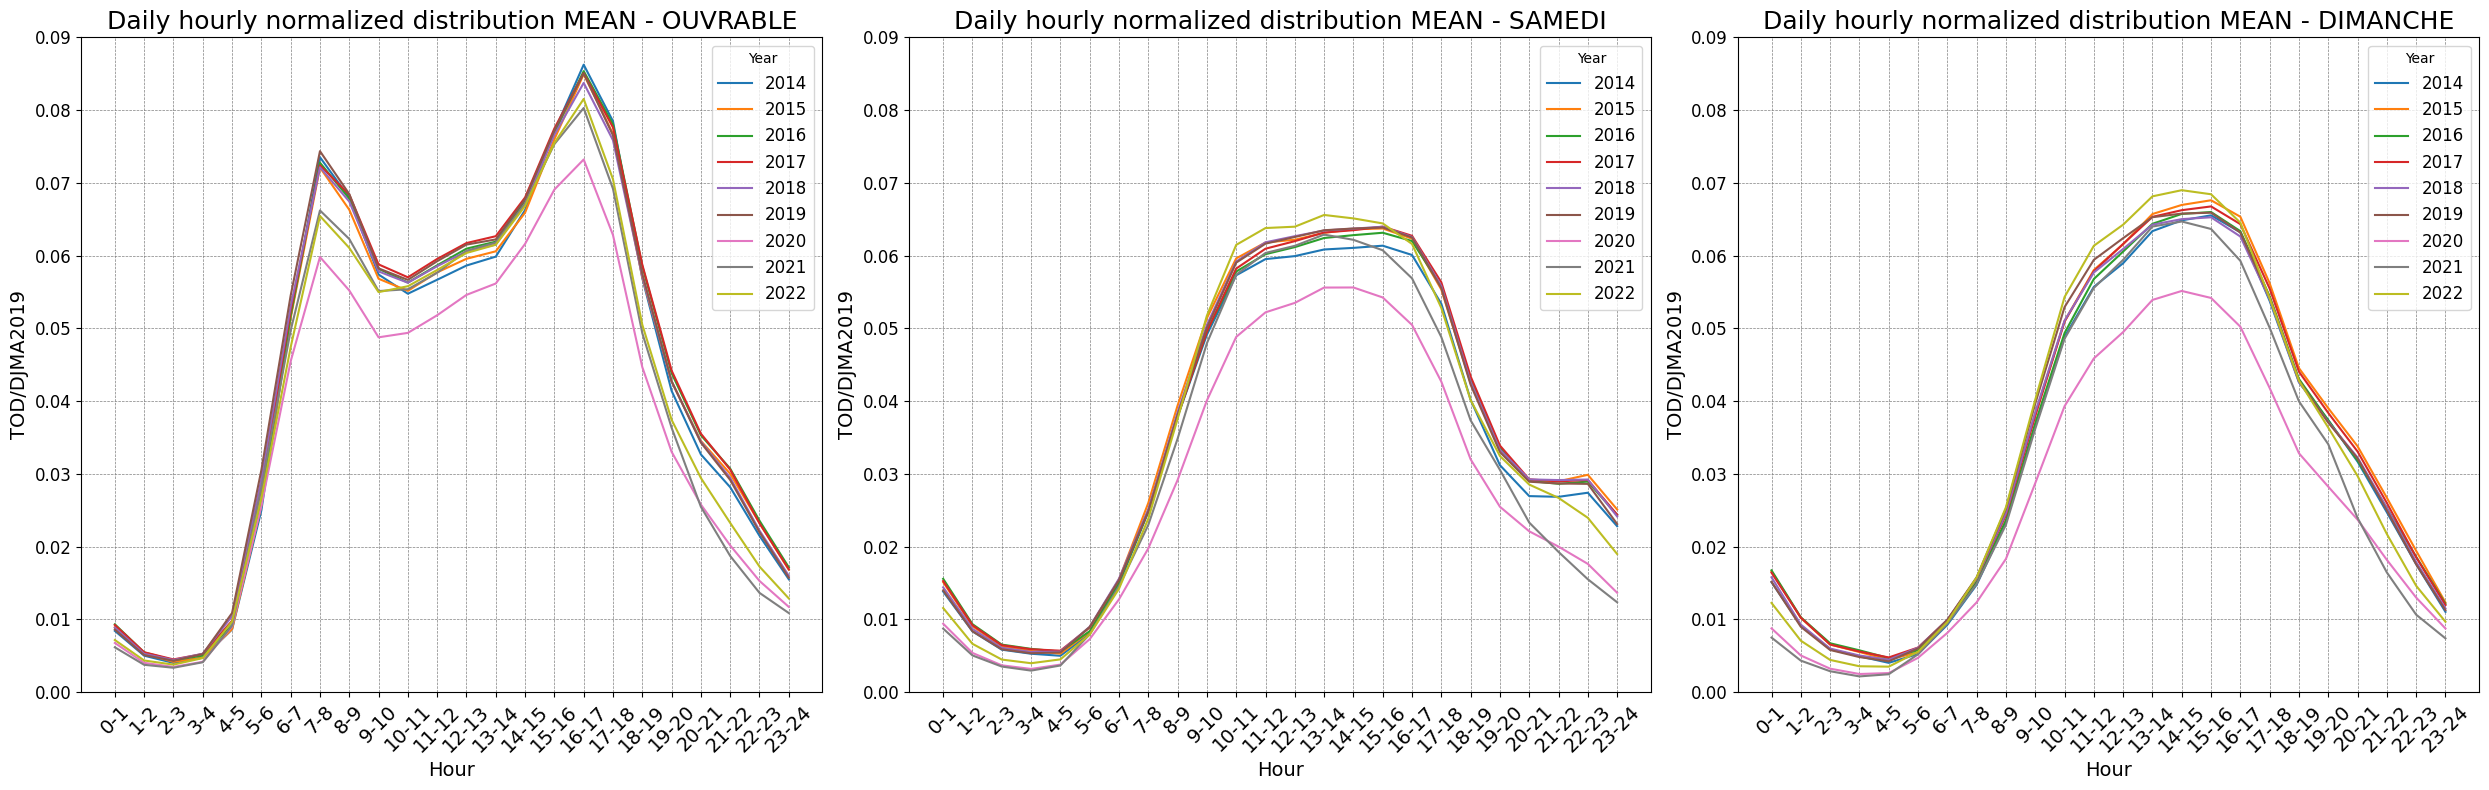

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the custom order of hours
hour_order = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12',
              '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']

# Step 1: Group by 'ANNEE' and 'HRE' and calculate the mean
grouped = filtered_df.groupby(['ANNEE', 'HRE']).mean().reset_index()

# Step 2: Pivot the data
pivot_data = grouped.pivot(index='HRE', columns='ANNEE', values=['OUVRABLE', 'SAMEDI', 'DIMANCHE']).reindex(hour_order)

# Step 3: Plot the means with updated aesthetics
plt.figure(figsize=(25, 8))

# Plot for OUVRABLE
plt.subplot(1, 3, 1)
for year in pivot_data['OUVRABLE'].columns:
    sns.lineplot(x=pivot_data.index, y=pivot_data['OUVRABLE'][year], label=str(year))
plt.title('Daily hourly normalized distribution MEAN - OUVRABLE', fontsize = 18)
plt.xlabel('Hour', fontsize = 14)
plt.ylabel('TOD/DJMA2019', fontsize = 14)
plt.xticks(rotation=45, fontsize = 14)  # Rotate x-axis labels
plt.ylim(0, 0.09)  # Set y-axis limits
plt.legend(title='Year', fontsize = 12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='y', labelsize=12)


# Plot for SAMEDI
plt.subplot(1, 3, 2)
for year in pivot_data['SAMEDI'].columns:
    sns.lineplot(x=pivot_data.index, y=pivot_data['SAMEDI'][year], label=str(year))
plt.title('Daily hourly normalized distribution MEAN - SAMEDI', fontsize = 18)
plt.xlabel('Hour', fontsize = 14)
plt.ylabel('TOD/DJMA2019', fontsize = 14)
plt.xticks(rotation=45, fontsize = 14)  # Rotate x-axis labels
plt.ylim(0, 0.09)  # Set y-axis limits
plt.legend(title='Year', fontsize = 12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Add gridlines
plt.tick_params(axis='y', labelsize=12)

# Plot for DIMANCHE
plt.subplot(1, 3, 3)
for year in pivot_data['DIMANCHE'].columns:
    sns.lineplot(x=pivot_data.index, y=pivot_data['DIMANCHE'][year], label=str(year))
plt.title('Daily hourly normalized distribution MEAN - DIMANCHE', fontsize = 18)
plt.xlabel('Hour', fontsize = 14)
plt.ylabel('TOD/DJMA2019', fontsize = 14)
plt.xticks(rotation=45, fontsize = 14)  # Rotate x-axis labels
plt.ylim(0, 0.09)  # Set y-axis limits
plt.legend(title='Year', fontsize = 12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Add gridlines
plt.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

<ipython-input-28-c53ec02cf30d>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_fact = filtered_df_fact.groupby(['ANNEE', 'MOIS']).mean().reset_index()


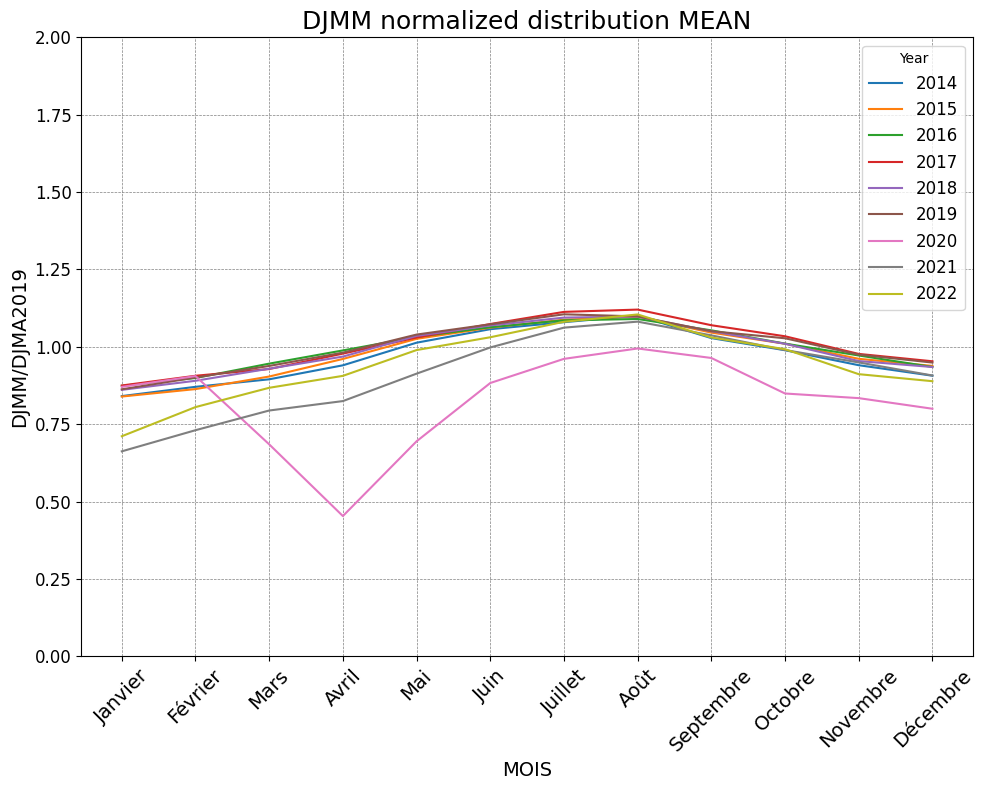

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Group by 'ANNEE' and 'MOIS' and calculate the mean
grouped_fact = filtered_df_fact.groupby(['ANNEE', 'MOIS']).mean().reset_index()

# Step 2: Pivot the data
pivot_data = grouped_fact.pivot(index='MOIS', columns='ANNEE', values=['MOYEN']).reindex(month_order)

# Step 3: Plot the means with updated aesthetics
plt.figure(figsize=(10, 8))

# Plot for OUVRABLE
plt.subplot(1, 1,1)
for year in pivot_data['MOYEN'].columns:
    sns.lineplot(x=pivot_data.index, y=pivot_data['MOYEN'][year], label=str(year))
plt.title('DJMM normalized distribution MEAN', fontsize = 18)
plt.xlabel('MOIS', fontsize = 14)
plt.ylabel('DJMM/DJMA2019', fontsize = 14)
plt.xticks(rotation=45, fontsize = 14)  # Rotate x-axis labels
plt.ylim(0, 2)  # Set y-axis limits
plt.legend(title='Year', fontsize = 12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='y', labelsize=12)


plt.tight_layout()
plt.show()

In [29]:
year = 2019  # The year
sectn_values = filtered_df[filtered_df['ANNEE'] == year]['SECTN'].unique()

# Filter the DataFrame to only include rows where 'HRE' is in 'hour_order'
filtered_df_2019 = filtered_df[(filtered_df['ANNEE'] == year) &
                                    (filtered_df['SECTN'].isin(sectn_values)) &
                                    (filtered_df['HRE'].isin(hour_order))]

In [30]:
filtered_df_2019

SECTN  ANNEE    HRE  DIMANCHE    SAMEDI  OUVRABLE  DJMA_total  \
175    0005512000   2019    0-1  0.012639  0.010069  0.004861     14400.0   
176    0005512000   2019    1-2  0.006458  0.004722  0.002708     14400.0   
177    0005512000   2019    2-3  0.003194  0.002847  0.002500     14400.0   
178    0005512000   2019    3-4  0.002083  0.002500  0.002917     14400.0   
179    0005512000   2019    4-5  0.002292  0.003264  0.006528     14400.0   
...           ...    ...    ...       ...       ...       ...         ...   
89819  0002062000   2019  19-20  0.056250  0.032833  0.035750     12000.0   
89820  0002062000   2019  20-21  0.045250  0.031750  0.027917     12000.0   
89821  0002062000   2019  21-22  0.027250  0.028583  0.020500     12000.0   
89822  0002062000   2019  22-23  0.014917  0.023167  0.014417     12000.0   
89823  0002062000   2019  23-24  0.007667  0.013833  0.009083     12000.0   

       DJME_total  DJMH_total  DJMA_total_2019  
175       16000.0     12800.0          14400.0  
176       16000.0     12800.0          14400.0  
177       16000.0     12800.0          14400.0  
178       16000.0     12800.0          14400.0  
179       16000.0     12800.0          14400.0  
...           ...         ...              ...  
89819     14900.0      9700.0          12000.0  
89820     14900.0      9700.0          12000.0  
89821     14900.0      9700.0          12000.0  
89822     14900.0      9700.0          12000.0  
89823     14900.0      9700.0          12000.0  

[12408 rows x 10 columns]

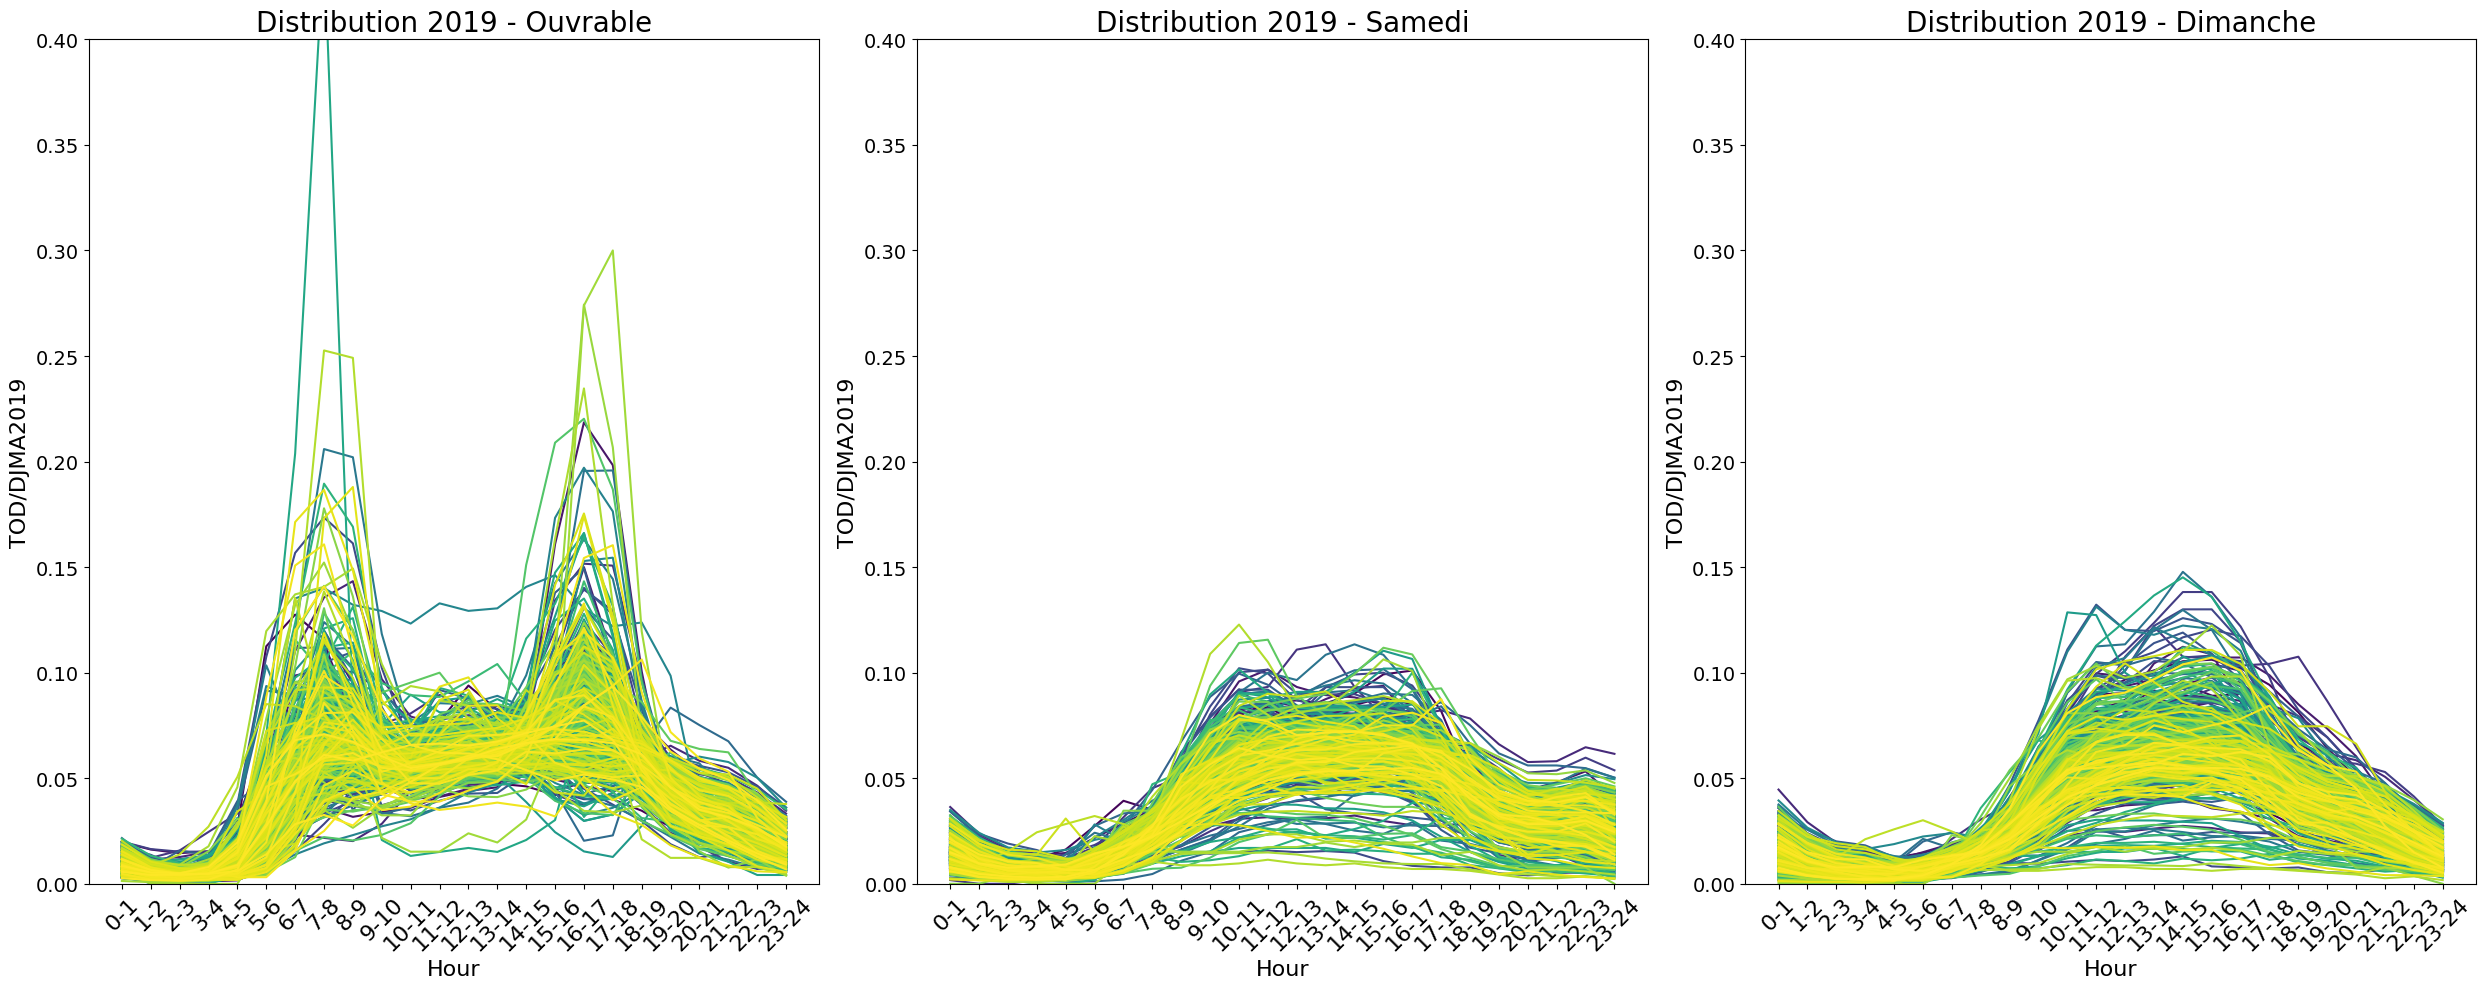

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


# Define the figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 10))  # 1 row, 3 columns
# Plot for OUVRABLE
sns.lineplot(data=filtered_df_2019, x='HRE', y='OUVRABLE', hue='SECTN', ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Distribution 2019 - Ouvrable', fontsize=20)
axes[0].set_xlabel('Hour', fontsize=16)
axes[0].set_ylabel('TOD/DJMA2019', fontsize=16)
axes[0].set_xticks(range(len(hour_order)))
axes[0].set_xticklabels(hour_order, rotation=45, fontsize=16)
axes[0].set_ylim(0, 0.4)
axes[0].tick_params(axis='y', labelsize=14)

# Plot for SAMEDI
sns.lineplot(data=filtered_df_2019, x='HRE', y='SAMEDI', hue='SECTN', ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('Distribution 2019 - Samedi', fontsize=20)
axes[1].set_xlabel('Hour', fontsize=16)
axes[1].set_ylabel('TOD/DJMA2019', fontsize=16)
axes[1].set_xticks(range(len(hour_order)))
axes[1].set_xticklabels(hour_order, rotation=45, fontsize=16)
axes[1].set_ylim(0, 0.4)
axes[1].tick_params(axis='y', labelsize=14)

# Plot for DIMANCHE
sns.lineplot(data=filtered_df_2019, x='HRE', y='DIMANCHE', hue='SECTN', ax=axes[2], palette='viridis', legend=False)
axes[2].set_title('Distribution 2019 - Dimanche', fontsize=20)
axes[2].set_xlabel('Hour', fontsize=16)
axes[2].set_ylabel('TOD/DJMA2019', fontsize=16)
axes[2].set_xticks(range(len(hour_order)))
axes[2].set_xticklabels(hour_order, rotation=45, fontsize=16)
axes[2].set_ylim(0, 0.4)
axes[2].tick_params(axis='y', labelsize=14)

# layout and display the plot
plt.tight_layout()
plt.show()


In [32]:
year = 2022  # The year
sectn_values = filtered_df[filtered_df['ANNEE'] == year]['SECTN'].unique()

# Filter the DataFrame to only include rows where 'HRE' is in 'hour_order'
filtered_df_2022 = filtered_df[(filtered_df['ANNEE'] == year) &
                                    (filtered_df['SECTN'].isin(sectn_values)) &
                                    (filtered_df['HRE'].isin(hour_order))]

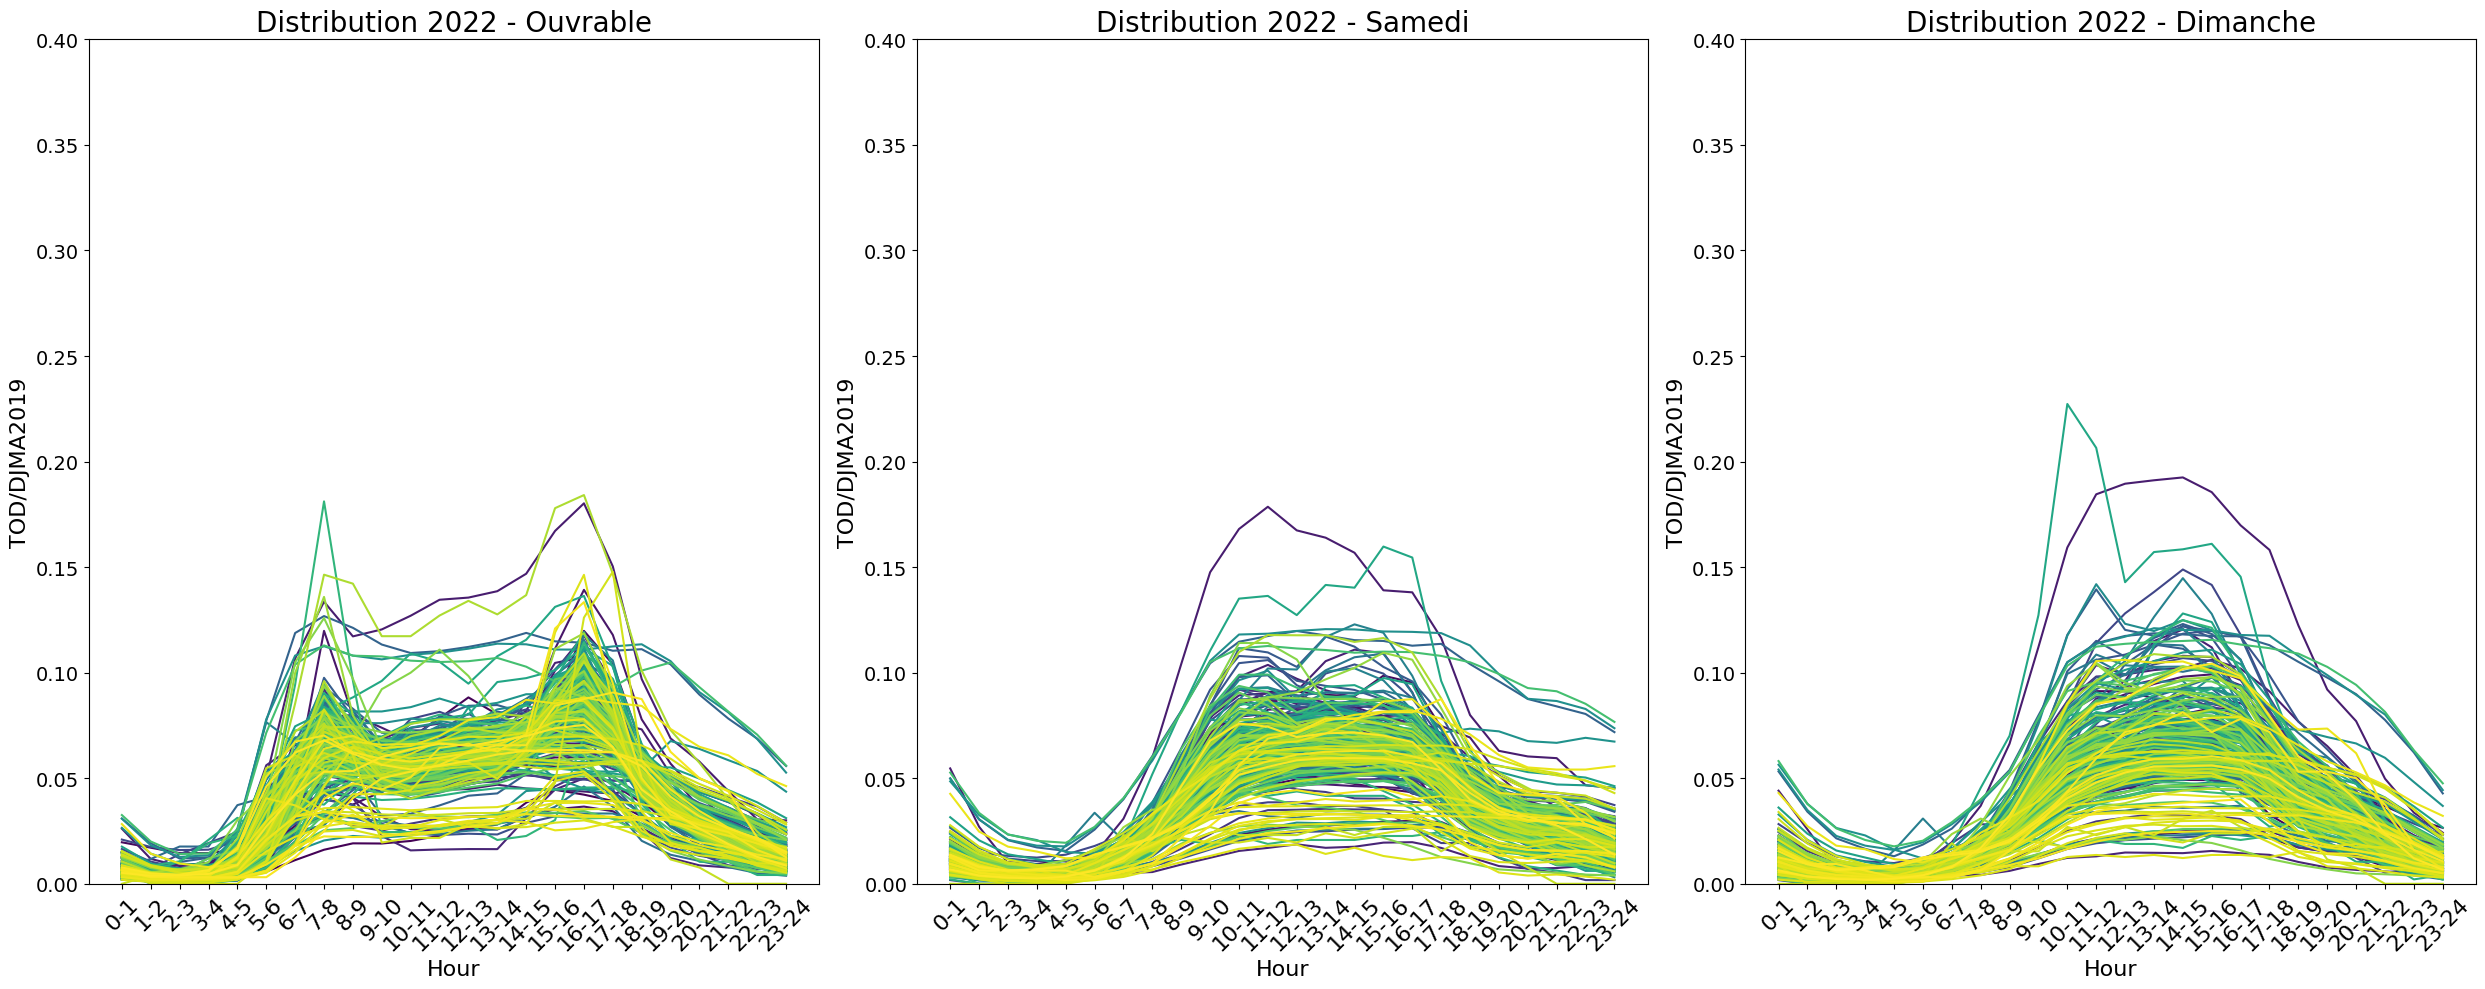

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 10))  # 1 row, 3 columns
# Plot for OUVRABLE
sns.lineplot(data=filtered_df_2022, x='HRE', y='OUVRABLE', hue='SECTN', ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Distribution 2022 - Ouvrable', fontsize=20)
axes[0].set_xlabel('Hour', fontsize=16)
axes[0].set_ylabel('TOD/DJMA2019', fontsize=16)
axes[0].set_xticks(range(len(hour_order)))
axes[0].set_xticklabels(hour_order, rotation=45, fontsize=16)
axes[0].set_ylim(0, 0.4)
axes[0].tick_params(axis='y', labelsize=14)

# Plot for SAMEDI
sns.lineplot(data=filtered_df_2022, x='HRE', y='SAMEDI', hue='SECTN', ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('Distribution 2022 - Samedi', fontsize=20)
axes[1].set_xlabel('Hour', fontsize=16)
axes[1].set_ylabel('TOD/DJMA2019', fontsize=16)
axes[1].set_xticks(range(len(hour_order)))
axes[1].set_xticklabels(hour_order, rotation=45, fontsize=16)
axes[1].set_ylim(0, 0.4)
axes[1].tick_params(axis='y', labelsize=14)

# Plot for DIMANCHE
sns.lineplot(data=filtered_df_2022, x='HRE', y='DIMANCHE', hue='SECTN', ax=axes[2], palette='viridis', legend=False)
axes[2].set_title('Distribution 2022 - Dimanche', fontsize=20)
axes[2].set_xlabel('Hour', fontsize=16)
axes[2].set_ylabel('TOD/DJMA2019', fontsize=16)
axes[2].set_xticks(range(len(hour_order)))
axes[2].set_xticklabels(hour_order, rotation=45, fontsize=16)
axes[2].set_ylim(0, 0.4)
axes[2].tick_params(axis='y', labelsize=14)
# layout and display the plot
plt.tight_layout()
plt.show()

In [34]:
# NOW FOR FACT84
year = 2019  # The year
sectn_values = filtered_df_fact[filtered_df_fact['ANNEE'] == year]['SECTN'].unique()

# Filter the DataFrame to only include rows where 'HRE' is in 'hour_order'
filtered_df_2019_fact = filtered_df_fact[(filtered_df_fact['ANNEE'] == year) &
                                    (filtered_df_fact['SECTN'].isin(sectn_values)) &
                                    (filtered_df_fact['MOIS'].isin(month_order))]

In [35]:
filtered_df_2019_fact

SECTN  ANNEE       MOIS  DIMANCHE     LUNDI     MARDI  MERCREDI  \
84     0005512000   2019    Janvier  0.747917  0.819444  0.813889  0.813194   
85     0005512000   2019    Février  0.881250  0.837500  0.805556  0.856944   
86     0005512000   2019       Mars  0.856250  0.847222  0.859028  0.884722   
87     0005512000   2019      Avril  0.898611  0.888194  0.872917  0.897222   
88     0005512000   2019        Mai  1.019444  0.943750  0.927778  0.964583   
...           ...    ...        ...       ...       ...       ...       ...   
47383  0002062000   2019       Août  1.871667  1.339167  1.278333  1.329167   
47384  0002062000   2019  Septembre  1.318333  1.017500  0.955000  1.007500   
47385  0002062000   2019    Octobre  1.149167  0.953333  0.916667  0.955000   
47386  0002062000   2019   Novembre  0.935833  0.867500  0.835000  0.844167   
47387  0002062000   2019   Décembre  0.845833  0.776667  0.761667  0.804167   

          JEUDI  VENDREDI    SAMEDI     MOYEN  DJMA_total  DJME_total  \
84     0.862500  0.980556  0.785417  0.833333     14400.0     16000.0   
85     0.903472  1.059028  0.865972  0.888889     14400.0     16000.0   
86     0.944444  1.102083  0.879167  0.909722     14400.0     16000.0   
87     0.963889  1.122917  0.969444  0.951389     14400.0     16000.0   
88     1.022917  1.186806  0.990972  1.006944     14400.0     16000.0   
...         ...       ...       ...       ...         ...         ...   
47383  1.453333  1.690000  1.561667  1.500000     12000.0     14900.0   
47384  1.100000  1.260000  1.025833  1.100000     12000.0     14900.0   
47385  0.998333  1.153333  0.993333  1.016667     12000.0     14900.0   
47386  0.909167  0.990833  0.825833  0.883333     12000.0     14900.0   
47387  0.860000  0.938333  0.690000  0.808333     12000.0     14900.0   

       DJMH_total  DJMA_total_2019  
84        12800.0          14400.0  
85        12800.0          14400.0  
86        12800.0          14400.0  
87        12800.0          14400.0  
88        12800.0          14400.0  
...           ...              ...  
47383      9700.0          12000.0  
47384      9700.0          12000.0  
47385      9700.0          12000.0  
47386      9700.0          12000.0  
47387      9700.0          12000.0  

[6204 rows x 15 columns]

<ipython-input-36-23cf0202a21e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(month_order, rotation=45, fontsize=16)


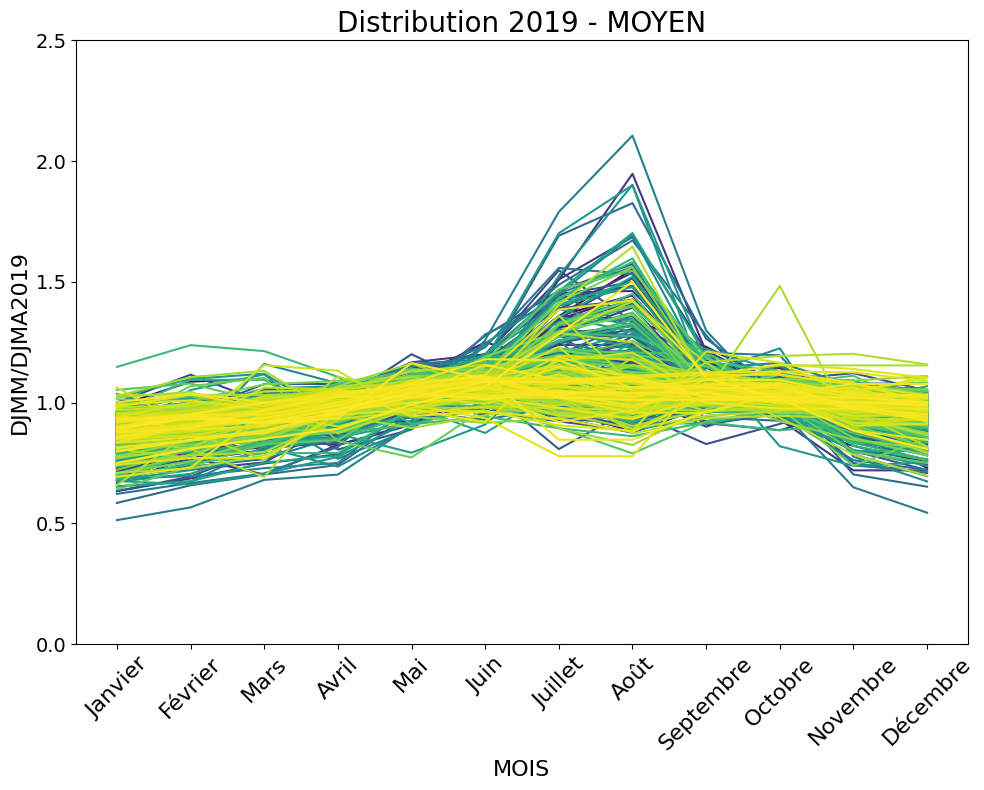

In [36]:
# Define the figure and axes for the subplot
fig, ax = plt.subplots(figsize=(10, 8))  # No need for 1,1 here since it's the default for a single plot

# Plot for MOYEN
sns.lineplot(data=filtered_df_2019_fact, x='MOIS', y='MOYEN', hue='SECTN', ax=ax, palette='viridis', legend=False)
ax.set_title('Distribution 2019 - MOYEN', fontsize=20)
ax.set_xlabel('MOIS', fontsize=16)
ax.set_ylabel('DJMM/DJMA2019', fontsize=16)

# Assuming 'hour_order' holds the correct order for 'MOIS', otherwise you should create a 'month_order' list that does.
ax.set_xticklabels(month_order, rotation=45, fontsize=16)
ax.set_ylim(0, 2.5)
ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

In [37]:
# NOW FOR FACT84
year = 2022  # The year
sectn_values = filtered_df_fact[filtered_df_fact['ANNEE'] == year]['SECTN'].unique()

# Filter the DataFrame to only include rows where 'HRE' is in 'hour_order'
filtered_df_2022_fact = filtered_df_fact[(filtered_df_fact['ANNEE'] == year) &
                                    (filtered_df_fact['SECTN'].isin(sectn_values)) &
                                    (filtered_df_fact['MOIS'].isin(month_order))]

<ipython-input-38-e670d1297da8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(month_order, rotation=45, fontsize=16)


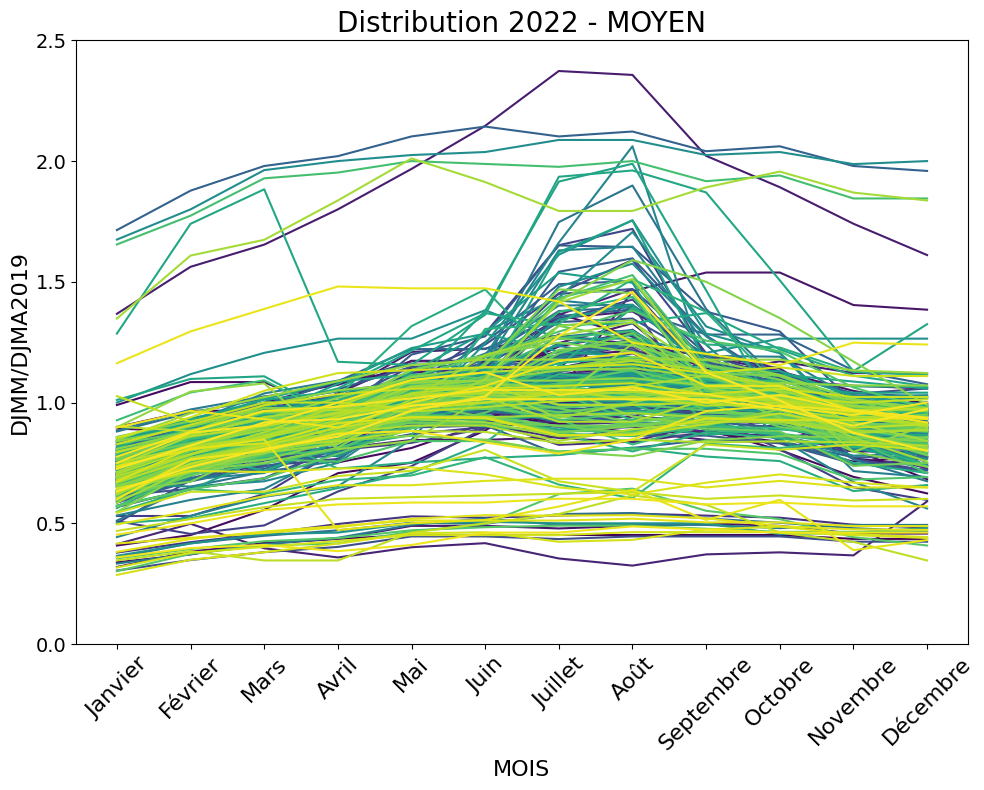

In [38]:
# Define the figure and axes for the subplot
fig, ax = plt.subplots(figsize=(10, 8))  # No need for 1,1 here since it's the default for a single plot

# Plot for MOYEN
sns.lineplot(data=filtered_df_2022_fact, x='MOIS', y='MOYEN', hue='SECTN', ax=ax, palette='viridis', legend=False)
ax.set_title('Distribution 2022 - MOYEN', fontsize=20)
ax.set_xlabel('MOIS', fontsize=16)
ax.set_ylabel('DJMM/DJMA2019', fontsize=16)

# Assuming 'hour_order' holds the correct order for 'MOIS', otherwise you should create a 'month_order' list that does.
ax.set_xticklabels(month_order, rotation=45, fontsize=16)
ax.set_ylim(0, 2.5)
ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

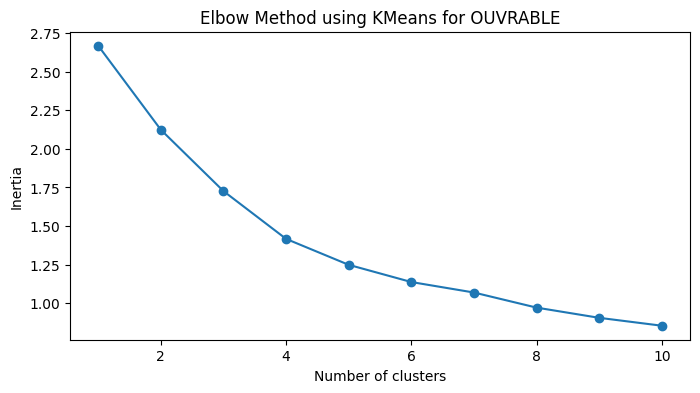

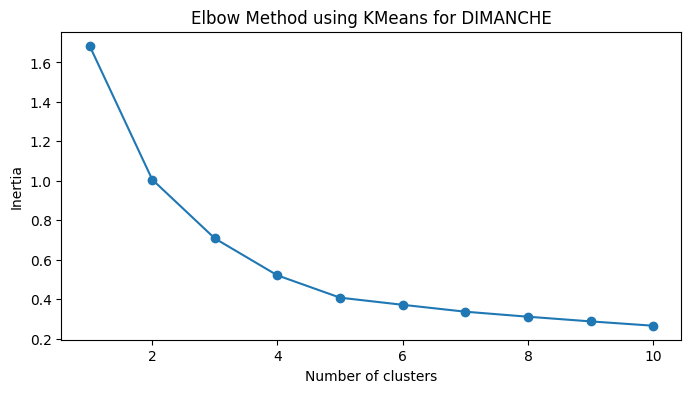

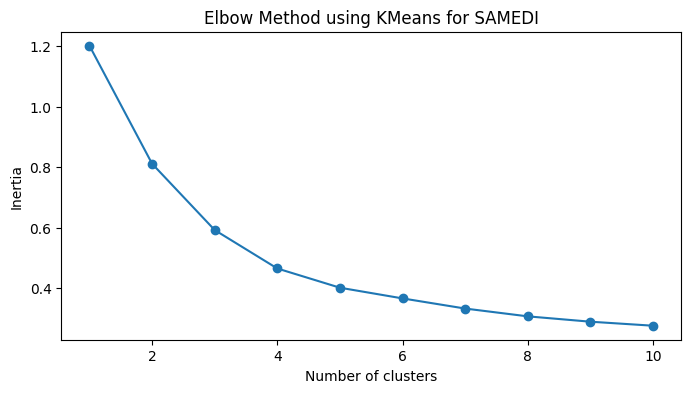

In [39]:
from sklearn.cluster import KMeans

def fit_kmeans(data, n_clusters=4, n_init=10):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=0).fit(data)
    return kmeans.labels_

def calculate_elbow_with_kmeans(data, max_clusters=10, n_init=10):
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, n_init=n_init, random_state=0).fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

# Define the function to process data and plot elbow
def process_and_plot_elbow_kmeans(df, hour_column, value_column, max_clusters=10):
    # Pivot the DataFrame
    df_pivot = df[df['ANNEE'] == 2019].pivot(index='SECTN', columns=hour_column, values=value_column)
    df_pivot.fillna(0, inplace=True)

    # Convert the pivot table to a 2D numpy array
    X = np.array(df_pivot)

    # Calculate inertia using KMeans
    inertia = calculate_elbow_with_kmeans(X, max_clusters, n_init=10)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title(f'Elbow Method using KMeans for {value_column}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

# Run the process for each traffic type
process_and_plot_elbow_kmeans(filtered_df, 'HRE', 'OUVRABLE', max_clusters=10)
process_and_plot_elbow_kmeans(filtered_df, 'HRE', 'DIMANCHE', max_clusters=10)
process_and_plot_elbow_kmeans(filtered_df, 'HRE', 'SAMEDI', max_clusters=10)


In [40]:
from sklearn.cluster import KMeans

def cluster_sectn_annually(df, value_column, n_clusters=4, cluster_suffix=''):
    # Aggregate the values by SECTN and ANNEE, taking the mean across all HRE
    df_agg = df.groupby(['SECTN', 'ANNEE'])[value_column].mean().reset_index()

    # Perform clustering for each ANNEE
    cluster_labels = {}
    for year in df_agg['ANNEE'].unique():
        year_data = df_agg[df_agg['ANNEE'] == year]
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
        cluster_labels[year] = kmeans.fit_predict(year_data[[value_column]])

    # Assign the cluster labels to the aggregated data
    df_agg['cluster'] = None
    for year in cluster_labels:
        df_agg.loc[df_agg['ANNEE'] == year, 'cluster'] = cluster_labels[year]

    # Rename the 'cluster' column to include the suffix
    df_agg.rename(columns={'cluster': f'cluster_{cluster_suffix}'}, inplace=True)

    # Merge the cluster labels back onto the original dataframe
    df = df.merge(df_agg[['SECTN', 'ANNEE', f'cluster_{cluster_suffix}']], on=['SECTN', 'ANNEE'], how='left')

    return df

# Perform clustering for each traffic type and create a uniquely named cluster column
clustered_df = filtered_df.copy()
clustered_df = cluster_sectn_annually(clustered_df, 'OUVRABLE', n_clusters=3, cluster_suffix='OUVRABLE')
clustered_df = cluster_sectn_annually(clustered_df, 'SAMEDI', n_clusters=3, cluster_suffix='SAMEDI')
clustered_df = cluster_sectn_annually(clustered_df, 'DIMANCHE', n_clusters=3, cluster_suffix='DIMANCHE')

In [41]:
clustered_df

SECTN  ANNEE    HRE  DIMANCHE    SAMEDI  OUVRABLE  DJMA_total  \
0      0005512000   2016    0-1  0.012778  0.011111  0.005347     12900.0   
1      0005512000   2016    1-2  0.006250  0.005000  0.002431     12900.0   
2      0005512000   2016    2-3  0.003194  0.002917  0.002153     12900.0   
3      0005512000   2016    3-4  0.002153  0.002500  0.002431     12900.0   
4      0005512000   2016    4-5  0.001736  0.002847  0.005556     12900.0   
...           ...    ...    ...       ...       ...       ...         ...   
86323  0002062000   2018  19-20  0.053750  0.033583  0.034583     11800.0   
86324  0002062000   2018  20-21  0.042667  0.030500  0.027667     11800.0   
86325  0002062000   2018  21-22  0.025667  0.028417  0.020417     11800.0   
86326  0002062000   2018  22-23  0.014583  0.024083  0.014333     11800.0   
86327  0002062000   2018  23-24  0.008000  0.014917  0.009000     11800.0   

       DJME_total  DJMH_total  DJMA_total_2019 cluster_OUVRABLE  \
0         14400.0     11300.0          14400.0                0   
1         14400.0     11300.0          14400.0                0   
2         14400.0     11300.0          14400.0                0   
3         14400.0     11300.0          14400.0                0   
4         14400.0     11300.0          14400.0                0   
...           ...         ...              ...              ...   
86323     14600.0      9500.0          12000.0                2   
86324     14600.0      9500.0          12000.0                2   
86325     14600.0      9500.0          12000.0                2   
86326     14600.0      9500.0          12000.0                2   
86327     14600.0      9500.0          12000.0                2   

      cluster_SAMEDI cluster_DIMANCHE  
0                  0                1  
1                  0                1  
2                  0                1  
3                  0                1  
4                  0                1  
...              ...              ...  
86323              1                0  
86324              1                0  
86325              1                0  
86326              1                0  
86327              1                0  

[86328 rows x 13 columns]

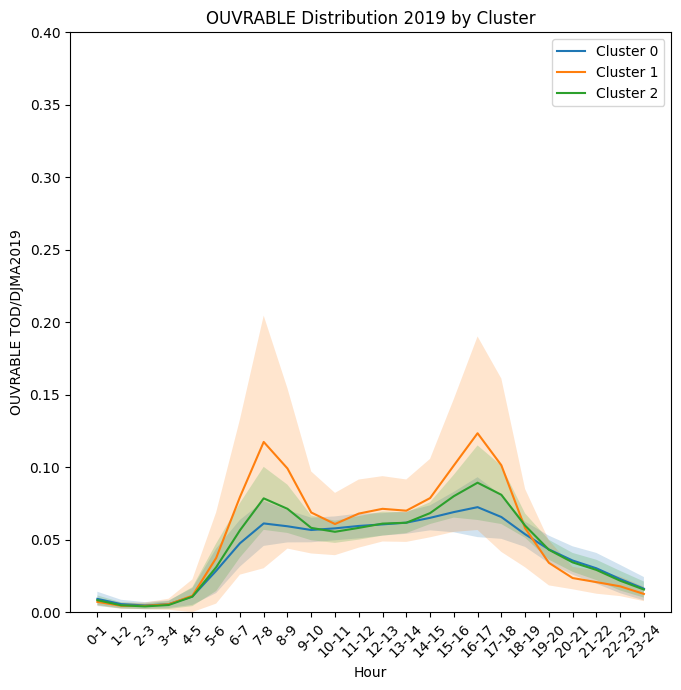

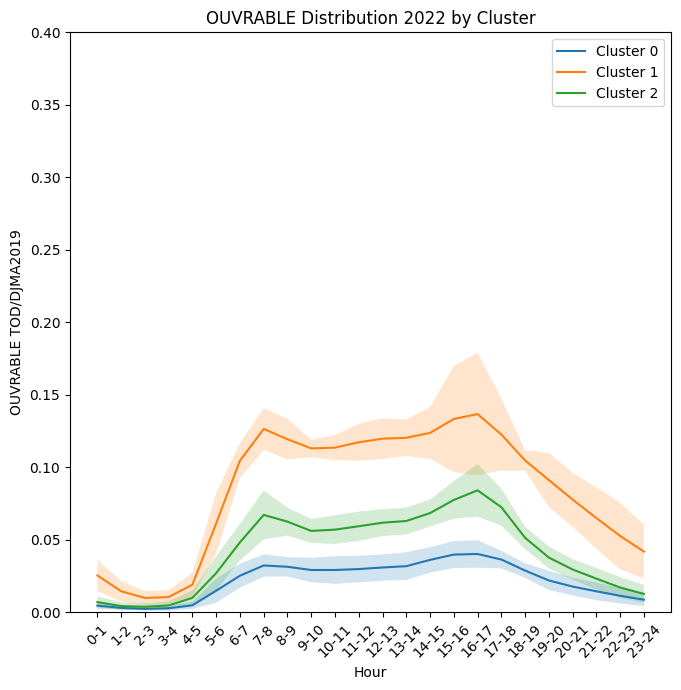

In [54]:
import numpy as np

def plot_cluster_centroids(df, year, traffic_type, cluster_column):
    # Filter the DataFrame for the given year and traffic type
    df_year = df[df['ANNEE'] == year]

    # Initialize the plot
    plt.figure(figsize=(7, 7))

    # Plot each cluster's centroid curve
    num_clusters = df_year[cluster_column].nunique()
    for cluster in range(num_clusters):
        # Filter the data for the current cluster
        cluster_data = df_year[df_year[cluster_column] == cluster]

        # Calculate the mean for each hour
        cluster_means = cluster_data.groupby('HRE')[traffic_type].mean()

        # Ensure the hours are in the correct order
        cluster_means = cluster_means.reindex(hour_order)

        # Plot the cluster's centroid curve
        plt.plot(cluster_means.index, cluster_means, label=f'Cluster {cluster}')

        # add a fill between standard deviations
        std_dev = cluster_data.groupby('HRE')[traffic_type].std()
        std_dev = std_dev.reindex(hour_order)
        plt.fill_between(cluster_means.index, cluster_means-std_dev, cluster_means+std_dev, alpha=0.2)

    # Finalize the plot
    plt.title(f'{traffic_type} Distribution {year} by Cluster')
    plt.xlabel('Hour')
    plt.ylabel(f'{traffic_type} TOD/DJMA2019')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.ylim(0, 0.4)
    plt.show()

# Example usage for 'OUVRABLE' in 2019
plot_cluster_centroids(clustered_df, 2019, 'OUVRABLE', 'cluster_OUVRABLE')
# Example usage for 'OUVRABLE' in 2022
plot_cluster_centroids(clustered_df, 2022, 'OUVRABLE', 'cluster_OUVRABLE')

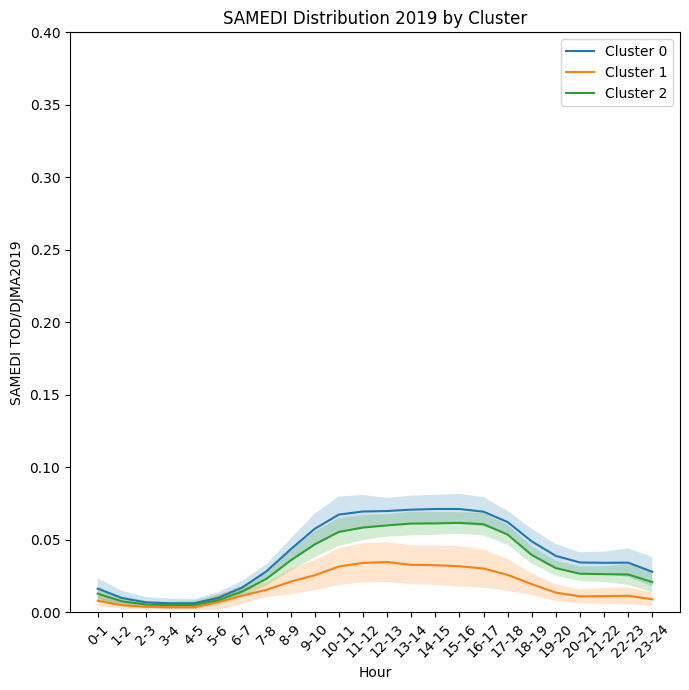

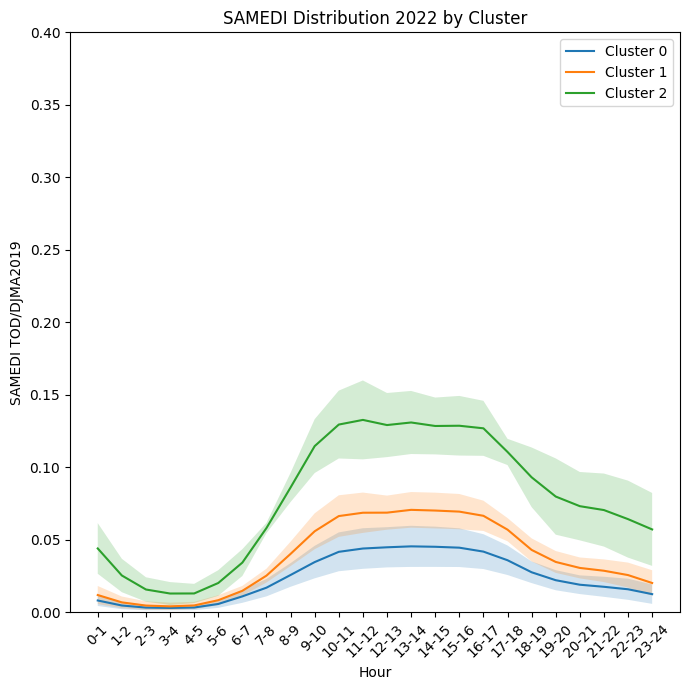

In [55]:
# Example usage for 'OUVRABLE' in 2019
plot_cluster_centroids(clustered_df, 2019, 'SAMEDI', 'cluster_SAMEDI')
# Example usage for 'OUVRABLE' in 2022
plot_cluster_centroids(clustered_df, 2022, 'SAMEDI', 'cluster_SAMEDI')

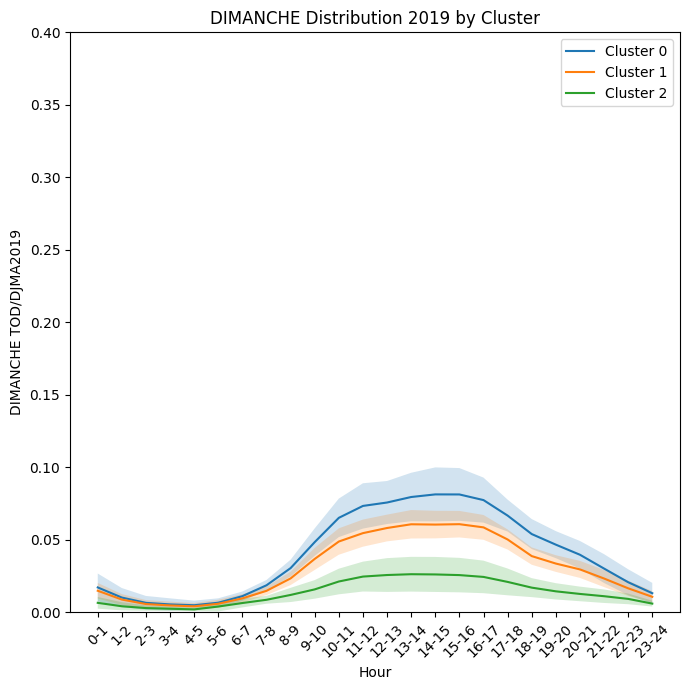

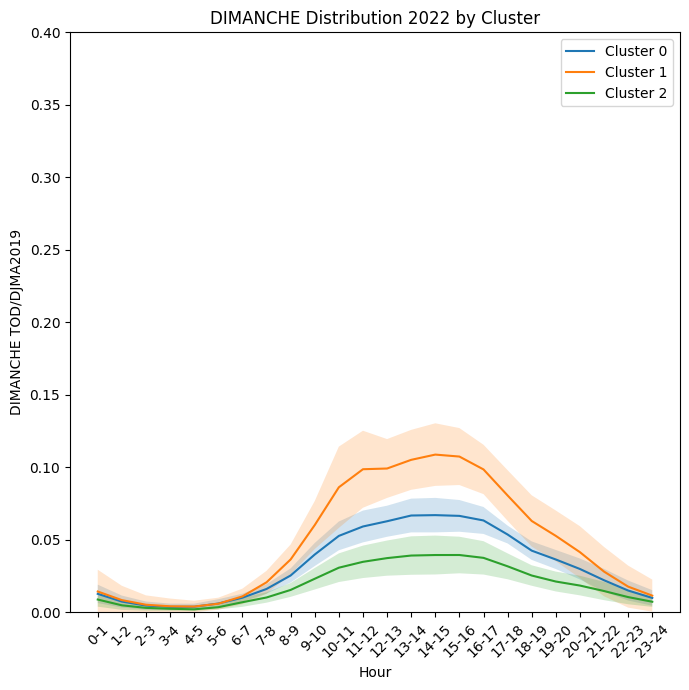

In [45]:
# Example usage for 'OUVRABLE' in 2022
plot_cluster_centroids(clustered_df, 2019, 'DIMANCHE', 'cluster_DIMANCHE')
# Example usage for 'OUVRABLE' in 2022
plot_cluster_centroids(clustered_df, 2022, 'DIMANCHE', 'cluster_DIMANCHE')

In [44]:
filtered_df_fact

SECTN  ANNEE       MOIS  DIMANCHE     LUNDI     MARDI  MERCREDI  \
0      0005512000   2016    Janvier  0.706250  0.722222  0.669444  0.706944   
1      0005512000   2016    Février  0.748611  0.743750  0.734722  0.744444   
2      0005512000   2016       Mars  0.837500  0.747917  0.775694  0.792361   
3      0005512000   2016      Avril  0.827083  0.783333  0.779167  0.809722   
4      0005512000   2016        Mai  0.921528  0.839583  0.825000  0.842361   
...           ...    ...        ...       ...       ...       ...       ...   
47431  0002062000   2018       Août  1.840000  1.352500  1.232500  1.269167   
47432  0002062000   2018  Septembre  1.274167  1.023333  0.946667  1.000000   
47433  0002062000   2018    Octobre  1.055833  0.950000  0.900000  0.923333   
47434  0002062000   2018   Novembre  0.951667  0.834167  0.765000  0.782500   
47435  0002062000   2018   Décembre  0.643333  0.816667  0.800000  0.812500   

          JEUDI  VENDREDI    SAMEDI     MOYEN  DJMA_total  DJME_total  \
0      0.728472  0.916667  0.680556  0.736111     12900.0     14400.0   
1      0.811111  0.970139  0.723611  0.784722     12900.0     14400.0   
2      0.851389  0.961806  0.818056  0.826389     12900.0     14400.0   
3      0.864583  1.013194  0.860417  0.854167     12900.0     14400.0   
4      0.897222  1.067361  0.893056  0.895833     12900.0     14400.0   
...         ...       ...       ...       ...         ...         ...   
47431  1.435833  1.654167  1.610833  1.483333     11800.0     14600.0   
47432  1.089167  1.226667  1.037500  1.083333     11800.0     14600.0   
47433  1.008333  1.127500  0.938333  0.983333     11800.0     14600.0   
47434  0.917500  1.050833  0.773333  0.866667     11800.0     14600.0   
47435  0.840833  0.900833  0.753333  0.791667     11800.0     14600.0   

       DJMH_total  DJMA_total_2019  
0         11300.0          14400.0  
1         11300.0          14400.0  
2         11300.0          14400.0  
3         11300.0          14400.0  
4         11300.0          14400.0  
...           ...              ...  
47431      9500.0          12000.0  
47432      9500.0          12000.0  
47433      9500.0          12000.0  
47434      9500.0          12000.0  
47435      9500.0          12000.0  

[47436 rows x 15 columns]

In [46]:
from sklearn.cluster import KMeans

def cluster_sectn_annually(df, value_column, n_clusters=4, cluster_suffix=''):
    # Remove rows with NaN values in the value_column
    df_cleaned = df.dropna(subset=[value_column])

    # Aggregate the values by SECTN and ANNEE, taking the mean across all HRE
    df_agg = df_cleaned.groupby(['SECTN', 'ANNEE'])[value_column].mean().reset_index()

    # Perform clustering for each ANNEE
    cluster_labels = {}
    for year in df_agg['ANNEE'].unique():
        year_data = df_agg[df_agg['ANNEE'] == year]
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
        cluster_labels[year] = kmeans.fit_predict(year_data[[value_column]])

    # Assign the cluster labels to the aggregated data
    df_agg['cluster'] = None
    for year in cluster_labels:
        df_agg.loc[df_agg['ANNEE'] == year, 'cluster'] = cluster_labels[year]

    # Rename the 'cluster' column to include the suffix
    df_agg.rename(columns={'cluster': f'cluster_{cluster_suffix}'}, inplace=True)

    # Merge the cluster labels back onto the original dataframe
    df = df.merge(df_agg[['SECTN', 'ANNEE', f'cluster_{cluster_suffix}']], on=['SECTN', 'ANNEE'], how='left')

    return df

# Perform clustering for each traffic type and create a uniquely named cluster column
clustered_df_fact = filtered_df_fact.copy()
clustered_df_fact = cluster_sectn_annually(clustered_df_fact, 'MOYEN', n_clusters=3, cluster_suffix='MOYEN')

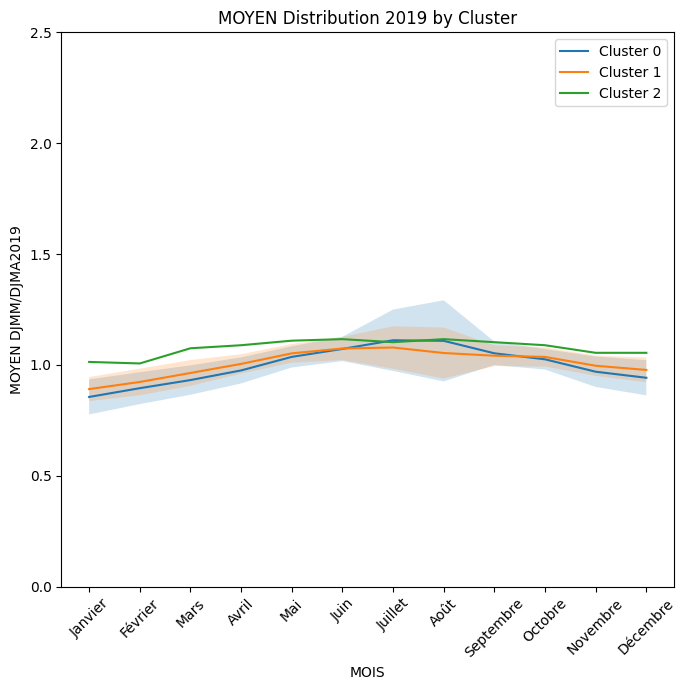

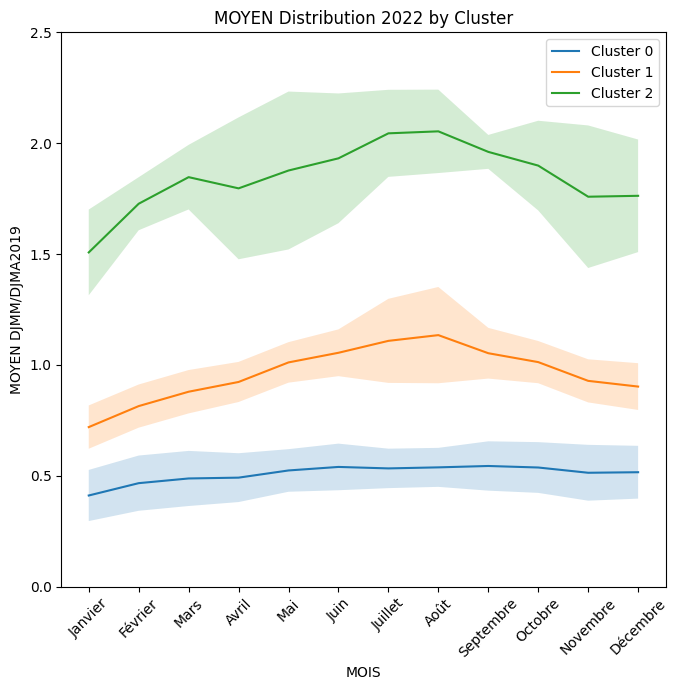

In [56]:
import numpy as np

def plot_cluster_centroids(df, year, traffic_type, cluster_column):
    # Filter the DataFrame for the given year and traffic type
    df_year = df[df['ANNEE'] == year]

    # Initialize the plot
    plt.figure(figsize=(7, 7))

    # Plot each cluster's centroid curve
    num_clusters = df_year[cluster_column].nunique()
    for cluster in range(num_clusters):
        # Filter the data for the current cluster
        cluster_data = df_year[df_year[cluster_column] == cluster]

        # Calculate the mean for each hour
        cluster_means = cluster_data.groupby('MOIS')[traffic_type].mean()

        # Ensure the hours are in the correct order
        cluster_means = cluster_means.reindex(month_order)

        # Plot the cluster's centroid curve
        plt.plot(cluster_means.index, cluster_means, label=f'Cluster {cluster}')

        # add a fill between standard deviations
        std_dev = cluster_data.groupby('MOIS')[traffic_type].std()
        std_dev = std_dev.reindex(month_order)
        plt.fill_between(cluster_means.index, cluster_means-std_dev, cluster_means+std_dev, alpha=0.2)

    # Finalize the plot
    plt.title(f'{traffic_type} Distribution {year} by Cluster')
    plt.xlabel('MOIS')
    plt.ylabel(f'{traffic_type} DJMM/DJMA2019')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.ylim(0, 2.5)
    plt.show()

# Example usage for 'OUVRABLE' in 2019
plot_cluster_centroids(clustered_df_fact, 2019, 'MOYEN', 'cluster_MOYEN')
# Example usage for 'OUVRABLE' in 2022
plot_cluster_centroids(clustered_df_fact, 2022, 'MOYEN', 'cluster_MOYEN')

In [165]:
region_admistr = pd.read_csv('/section_and_region_administrative.csv')

In [166]:
region_admistr.head()

Unnamed: 0  num_sectn_                                         RES_NM_REG
0           0  0013940000        Intersection: Montérégie + Centre-du-Québec
1           1  0011648000                                   Centre-du-Québec
2           2  0002505006                                         Montérégie
3           3  0007343000  Intersection: Chaudière-Appalaches + Capitale-...
4           4  0032520000                                         Montérégie

## Example for chapitre 3 - Section 3.3.4 in the report

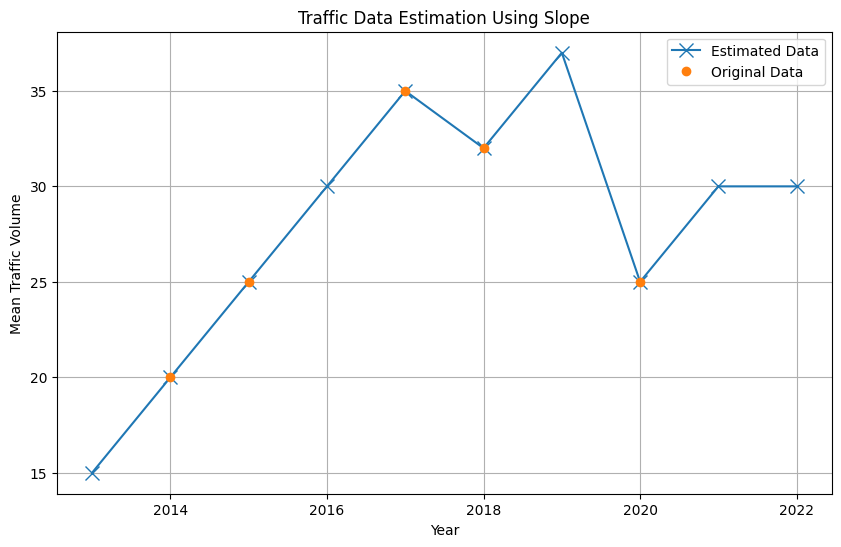

In [395]:
# slope example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulated data
data = {
    'RTSS': ['001'] * 10,
    'Year': np.arange(2013, 2023),
    'Mean_Value': [None, 20, 25, None, 35, 32, None, 25, None, None]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Manually setting a slope for the purpose of this example
slope = 5

# Function to estimate missing values using the slope
def estimate_values(df, slope):
    # Forward fill and backward fill to get the first and last known values
    filled_df = df.fillna(method='ffill').fillna(method='bfill')
    years = df['Year'].values
    values = filled_df['Mean_Value'].values

    # Replace None with np.nan to work with numerical operations
    df['Mean_Value'] = df['Mean_Value'].apply(lambda x: np.nan if x is None else x)

    # Estimate missing values using the slope
    for i, year in enumerate(years):
        if np.isnan(df.at[i, 'Mean_Value']):
            # Calculate the number of years from the nearest known value
            year_diff = year - years[i-1] if i > 0 else years[i+1] - year
            # Use the slope to estimate the missing value
            df.at[i, 'Mean_Value'] = values[i-1] + slope * year_diff if i > 0 else values[i+1] - slope * year_diff

    return df

# Estimate the missing values
estimated_df = estimate_values(df.copy(), slope)

# Plot the original and estimated values
plt.figure(figsize=(10, 6))
plt.plot('Year', 'Mean_Value', data=estimated_df, marker='x', linestyle='-', label='Estimated Data', markersize = 10)
plt.plot('Year', 'Mean_Value', data=df, marker='o', linestyle='', label='Original Data')

# Adding title and labels
plt.title('Traffic Data Estimation Using Slope')
plt.xlabel('Year')
plt.ylabel('Mean Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
pip install plotly


In [160]:
import pandas as pd
import plotly.graph_objs as go

# Step 1: Filter for unique SECTN values for the years 2019 and 2022
clusters_2019 = clustered_df[clustered_df['ANNEE'] == 2019][['SECTN', 'cluster_OUVRABLE']].drop_duplicates('SECTN')
clusters_2022 = clustered_df[clustered_df['ANNEE'] == 2022][['SECTN', 'cluster_OUVRABLE']].drop_duplicates('SECTN')

# Merge the 2019 and 2022 data on SECTN
transition_df = clusters_2019.merge(clusters_2022, on='SECTN', suffixes=('_2019', '_2022'))

# Count the transitions (make sure there are no duplicates in SECTN after the merge)
transition_counts = transition_df.groupby(['cluster_OUVRABLE_2019', 'cluster_OUVRABLE_2022']).size().reset_index(name='count')

#Create lists of source (2019 clusters), target (2022 clusters), and counts for the Sankey diagram
sources = transition_counts['cluster_OUVRABLE_2019'].values
targets = transition_counts['cluster_OUVRABLE_2022'].values + clusters_2019['cluster_OUVRABLE'].nunique()
values = transition_counts['count'].values

node_labels = ['2019 Cluster 0', '2019 Cluster 1', '2019 Cluster 2', '2022 Cluster 0', '2022 Cluster 1', '2022 Cluster 2']

# Define color palette for the nodes
node_colors = ['dodgerblue', 'lightcoral', 'green', 'dodgerblue', 'lightcoral', 'green']

fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=node_labels,
      color=node_colors,  # Set the colors for the nodes
    ),
    link=dict(
      source=sources,
      target=targets,
      value=values
    ))])

fig.update_layout(title_text='Sankey Diagram of SECTN Transitions from 2019 to 2022', font_size=10)
fig.show()

In [163]:
transition_df

SECTN cluster_OUVRABLE_2019 cluster_OUVRABLE_2022
0    0005512000                     0                     2
1    0044022800                     2                     0
2    0013286000                     0                     2
3    0001525500                     0                     2
4    0013210000                     0                     2
..          ...                   ...                   ...
269  0002016000                     2                     2
270  0002007400                     0                     2
271  0010512000                     2                     1
272  0002015500                     2                     2
273  0002062000                     0                     2

[274 rows x 3 columns]

In [167]:
# First, you may want to rename the column in 'region_admistr' to match 'transition_df' for clarity
region_admistr.rename(columns={'num_sectn_': 'SECTN'}, inplace=True)

# Now, perform the join operation
merged_transition_df = pd.merge(transition_df, region_admistr, on='SECTN', how='left')

merged_transition_df

SECTN cluster_OUVRABLE_2019 cluster_OUVRABLE_2022  Unnamed: 0  \
0    0005512000                     0                     2        4107   
1    0044022800                     2                     0        5808   
2    0013286000                     0                     2        4083   
3    0001525500                     0                     2        3086   
4    0013210000                     0                     2         459   
..          ...                   ...                   ...         ...   
269  0002016000                     2                     2        1632   
270  0002007400                     0                     2        2523   
271  0010512000                     2                     1        4796   
272  0002015500                     2                     2        2510   
273  0002062000                     0                     2        2556   

                        RES_NM_REG  
0                           Estrie  
1                            Laval  
2    Gaspésie–Îles-de-la-Madeleine  
3                      Laurentides  
4                       Montérégie  
..                             ...  
269                       Montréal  
270                     Montérégie  
271                      Outaouais  
272                       Montréal  
273           Chaudière-Appalaches  

[274 rows x 5 columns]

In [174]:
# diagram per region

import plotly.graph_objs as go
import random
# Step 1: Count distinct SECTN for each RES_NM_REG
reg_counts = merged_transition_df.groupby('RES_NM_REG')['SECTN'].nunique().reset_index(name='count')

# Step 2: Summarize the transitions for each RES_NM_REG to each cluster for 2019 and 2022
cluster_transitions = merged_transition_df.groupby(['RES_NM_REG', 'cluster_OUVRABLE_2019', 'cluster_OUVRABLE_2022']).size().reset_index(name='transition_count')

# Step 3: Set up the source and target nodes for the Sankey diagram
# Define the nodes for regions and clusters
region_nodes = reg_counts['RES_NM_REG'].tolist()
cluster_nodes_2019 = ['2019 Cluster ' + str(i) for i in range(merged_transition_df['cluster_OUVRABLE_2019'].nunique())]
cluster_nodes_2022 = ['2022 Cluster ' + str(i) for i in range(merged_transition_df['cluster_OUVRABLE_2022'].nunique())]
all_nodes = region_nodes + cluster_nodes_2019 + cluster_nodes_2022

# Define source and target indices for regions to 2019 clusters
sources = []
targets = []
values = []

# Map the regions and clusters to indices
node_indices = {node: idx for idx, node in enumerate(all_nodes)}

# Add the region to cluster 2019 links
for _, row in reg_counts.iterrows():
    for i in range(len(cluster_nodes_2019)):
        sources.append(node_indices[row['RES_NM_REG']])
        targets.append(node_indices[cluster_nodes_2019[i]])
        # Use the total count of SECTN for the region as value if the transition count is non-zero
        value = cluster_transitions[(cluster_transitions['RES_NM_REG'] == row['RES_NM_REG']) & (cluster_transitions['cluster_OUVRABLE_2019'] == i)]['transition_count'].sum()
        values.append(value if not pd.isnull(value) else 0)

# Add the 2019 to 2022 cluster transitions
for _, row in cluster_transitions.iterrows():
    sources.append(node_indices['2019 Cluster ' + str(row['cluster_OUVRABLE_2019'])])
    targets.append(node_indices['2022 Cluster ' + str(row['cluster_OUVRABLE_2022'])])
    values.append(row['transition_count'])

# Function to generate random colors
def generate_random_color():
    return '#' + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)])

# Define labels for all nodes
region_labels = reg_counts['RES_NM_REG'].tolist()
cluster_labels_2019 = ['2019 Cluster ' + str(i) for i in range(merged_transition_df['cluster_OUVRABLE_2019'].nunique())]
cluster_labels_2022 = ['2022 Cluster ' + str(i) for i in range(merged_transition_df['cluster_OUVRABLE_2022'].nunique())]
all_labels = region_labels + cluster_labels_2019 + cluster_labels_2022

# Define fixed colors for cluster nodes, and use a neutral color like 'lightgrey' for regions
cluster_colors = ['dodgerblue', 'lightcoral', 'green']
region_colors = ['lightgrey'] * len(region_labels)
node_colors = region_colors + cluster_colors + cluster_colors
# Define fixed colors for cluster nodes
cluster_colors = ['dodgerblue', 'lightcoral', 'green']

# Generate random colors for regions
region_colors = [generate_random_color() for _ in region_labels]
node_colors = region_colors + cluster_colors + cluster_colors

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=all_labels,
      color=node_colors  # Use the defined colors here
    ),
    link=dict(
      source=sources,
      target=targets,
      value=values
    ))])

fig.update_layout(title_text='Sankey Diagram of SECTN Transitions from 2019 to 2022 by RES_NM_REG', font_size=10)
fig.show()


In the plot we can see 271 sections, given the fact that probably we have 3 nan values that doesn't have a SECTN number with a matching region. But it is good to see the big picture.